##### INFORMACIÓN RELEVANTE

**VARIABLES DE LA BASE DE DATOS**

**1. Active_energy:** Energía activa entregada (kWh)
* Representa la cantidad de energía eléctrica real entregada en un periodo de tiempo específico.
* Es la energía que realiza trabajo efectivo, como encender luces, hacer funcionar motores o calentar dispositivos.
* Se mide en kilovatios-hora

**2. Reactive_energy:** Energía reactiva entregada (kVarh)
* Indica la cantidad de energía intercambiada entre la fuente de energía y una carga sin realizar trabajo útil.
* Esta energía se debe principalmente a la capacitancia e inductancia de los equipos eléctricos y no produce trabajo real, pero es esencial para mantener la calidad del voltaje en el sistema eléctrico.
* Se mide en kilovatios-amperios-reativos-hora

**3. Voltaje:**
* Es la diferencia de potencial eléctrico
* Es una medida de la fuerza electromotriz que impulsa el flujo de corriente eléctrica a través de un conuctor.
* Es la energía por unidad de carga eléctrica que proporciona la capacidad de realizar trabajo eléctrico.
* Voltaje_FA y Voltaje_FC son la fase A y C respectivamente.

**4. Energía Aparente:** Raiz(Active_energy^2 + Reactive_energy^2)

##### LIBRERÍAS

In [1]:
import os
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")

##### CONSOLIDACIÓN DE LOS DATOS DISPONIBLES

In [2]:
# Ruta del directorio que contiene los archivos de Excel
#drive.mount('/content/drive')
#directorio = "/content/drive/MyDrive/Proyecto electrodunas/GPA-Data-ElectroDunas"

directorio = os.getcwd() + "/Datos"

# Obtener la lista de archivos en el directorio
archivos_excel = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.csv')]

# Lista para almacenar los DataFrames de cada archivo
dataframes = []

# Iterar sobre los archivos de Excel en el directorio
for archivo in archivos_excel:
    ruta_archivo = os.path.join(directorio, archivo)
    df = pd.read_csv(ruta_archivo)

    # Agregar la columna Cliente_ID utilizando expresión regular para extraer el número
    Cliente_ID = re.search(r'\d+', archivo).group()
    df['Cliente_ID'] = Cliente_ID
    df['Cliente_ID'] = df['Cliente_ID'].astype('int64')

    # Validar que las columnas requeridas estén presentes en el DataFrame
    if all(col in df.columns for col in ["Fecha", "Active_energy", "Reactive_energy", "Voltaje_FA", "Voltaje_FC", "Cliente_ID"]):
        dataframes.append(df)
    else:
        print(f"Faltan columnas en el archivo {archivo}")

# Concatenar todos los DataFrames en uno solo
df_final = pd.concat(dataframes, ignore_index=True)

# Leer el archivo 'sector_economico_clientes.xlsx'
#df_sector = pd.read_excel('/content/drive/MyDrive/Proyecto electrodunas/GPA-Data-ElectroDunas/sector_economico_clientes.xlsx')
df_sector = pd.read_excel('Datos/sector_economico_clientes.xlsx')
# Renombrar columnas
df_sector = df_sector.rename(columns={'Cliente:':'Cliente_ID', 'Sector Económico:':'Sector_Economico'})

# Actualizar los valores de la columna Cliente_ID
df_sector['Cliente_ID'] = pd.to_numeric(df_sector['Cliente_ID'].str.replace('Cliente ', ''))

# Fusionar los DataFrames por 'Cliente_ID' y agregar la columna 'Sector_Economico'
df_resultado = pd.merge(df_final, df_sector, on='Cliente_ID')

# Mostrar el DataFrame resultante
df_resultado

Mounted at /content/drive


Fecha  Active_energy  Reactive_energy   Voltaje_FA  \
0       2021-01-01 00:00:00       0.291881         0.032022  2177.903904   
1       2021-01-01 01:00:00       0.165636         0.051760  2175.433588   
2       2021-01-01 02:00:00       0.231526         0.145776  2228.930556   
3       2021-01-01 03:00:00       0.595396         0.293655  2043.277873   
4       2021-01-01 04:00:00       0.802499         0.753280  2207.480123   
...                     ...            ...              ...          ...   
463420  2022-08-07 03:00:00       0.488331         0.042823  1846.060307   
463421  2022-08-07 04:00:00       0.373242         0.098315  1781.190283   
463422  2022-08-07 05:00:00       0.639498         0.119670  1812.042317   
463423  2022-08-07 06:00:00       0.473911         0.075118  1763.697303   
463424  2022-08-07 07:00:00       0.301186         0.039588  1833.376982   

         Voltaje_FC  Cliente_ID  \
0       2315.778626          18   
1       2050.903296          18   
2       2169.129233          18   
3       2051.131871          18   
4       2254.699271          18   
...             ...         ...   
463420  1833.775917          14   
463421  1792.889205          14   
463422  1789.768882          14   
463423  1830.269162          14   
463424  1757.808679          14   

                                         Sector_Economico  
0           Captación, tratamiento y distribución de agua  
1           Captación, tratamiento y distribución de agua  
2           Captación, tratamiento y distribución de agua  
3           Captación, tratamiento y distribución de agua  
4           Captación, tratamiento y distribución de agua  
...                                                   ...  
463420  Cultivo de otros frutos y nueces de árboles y ...  
463421  Cultivo de otros frutos y nueces de árboles y ...  
463422  Cultivo de otros frutos y nueces de árboles y ...  
463423  Cultivo de otros frutos y nueces de árboles y ...  
463424  Cultivo de otros frutos y nueces de árboles y ...  

[463425 rows x 7 columns]

In [3]:
# pip install openpyxl

In [4]:
df_resultado[['Active_energy','Reactive_energy','Voltaje_FA','Voltaje_FC']].describe().T

count         mean         std       min         25%  \
Active_energy    463425.0     1.472050    1.718780 -1.329018    0.242788   
Reactive_energy  463425.0     0.873086    1.158846  0.000000    0.112832   
Voltaje_FA       463425.0  1420.188470  766.299118  0.031000  719.462874   
Voltaje_FC       463425.0  1438.515836  746.447449  0.031000  748.148254   

                         50%          75%          max  
Active_energy       0.810771     1.992488    14.622644  
Reactive_energy     0.380650     1.222834    11.135141  
Voltaje_FA       1625.493463  2037.276385  4266.229746  
Voltaje_FC       1634.696089  2040.554497  4399.038932

In [5]:

 df_resultado.head()



Fecha  Active_energy  Reactive_energy   Voltaje_FA  \
0  2021-01-01 00:00:00       0.291881         0.032022  2177.903904   
1  2021-01-01 01:00:00       0.165636         0.051760  2175.433588   
2  2021-01-01 02:00:00       0.231526         0.145776  2228.930556   
3  2021-01-01 03:00:00       0.595396         0.293655  2043.277873   
4  2021-01-01 04:00:00       0.802499         0.753280  2207.480123   

    Voltaje_FC  Cliente_ID                               Sector_Economico  
0  2315.778626          18  Captación, tratamiento y distribución de agua  
1  2050.903296          18  Captación, tratamiento y distribución de agua  
2  2169.129233          18  Captación, tratamiento y distribución de agua  
3  2051.131871          18  Captación, tratamiento y distribución de agua  
4  2254.699271          18  Captación, tratamiento y distribución de agua

##### IDENTIFICACIÓN DE VALORES EN CERO

In [ ]:
def generar_resumen_valores_cero(dataframe):
    #Quita la columna de Sector Económico y Fecha
    dataframe = dataframe.drop(columns=['Sector_Economico','Fecha'])
    # Calcula la cantidad de valores en cero por columna
    valores_cero = (dataframe == 0).sum()

    # Calcula el porcentaje de valores en cero por columna
    porcentaje_valores_cero = (valores_cero / len(dataframe)) * 100

    # Crea un DataFrame con la información recopilada
    resumen_valores_cero = pd.DataFrame({
        'Valores en Cero': valores_cero,
        'Porcentaje Valores en Cero': porcentaje_valores_cero
    })

    return resumen_valores_cero

# Llama a la función para encontrar los valores en cero en tu DataFrame
valores_cero = generar_resumen_valores_cero(df_resultado)
print(valores_cero)

                 Valores en Cero  Porcentaje Valores en Cero
Active_energy              15013                    3.239575
Reactive_energy            15013                    3.239575
Voltaje_FA                     0                    0.000000
Voltaje_FC                     0                    0.000000
Cliente_ID                     0                    0.000000


###### VARIABLE HORA Y VARIABLE MES

In [226]:
# Convertir la columna 'Fecha' a tipo datetime si aún no lo está
df_resultado['Fecha'] = pd.to_datetime(df_resultado['Fecha'])

# Crear una nueva columna 'Hora' que contiene la hora de la fecha
df_resultado['Hora'] = df_resultado['Fecha'].dt.hour

# Crear una nueva columna 'MES' que contiene el mes de la fecha
df_resultado['Mes'] = df_resultado['Fecha'].dt.month

# Mostrar las primeras filas del DataFrame con la nueva columna 'Hora'
df_resultado.head()

Fecha  Active_energy  Reactive_energy   Voltaje_FA  \
0 2021-01-01 00:00:00       0.291881         0.032022  2177.903904   
1 2021-01-01 01:00:00       0.165636         0.051760  2175.433588   
2 2021-01-01 02:00:00       0.231526         0.145776  2228.930556   
3 2021-01-01 03:00:00       0.595396         0.293655  2043.277873   
4 2021-01-01 04:00:00       0.802499         0.753280  2207.480123   

    Voltaje_FC  Cliente_ID                               Sector_Economico  \
0  2315.778626          18  Captación, tratamiento y distribución de agua   
1  2050.903296          18  Captación, tratamiento y distribución de agua   
2  2169.129233          18  Captación, tratamiento y distribución de agua   
3  2051.131871          18  Captación, tratamiento y distribución de agua   
4  2254.699271          18  Captación, tratamiento y distribución de agua   

   Sector_Economico_Num  Apparent_energy  Hora Fecha_2  Dia_Semana_Num  Mes  
0                     0         0.293632     0  202101               4    1  
1                     0         0.173535     1  202101               4    1  
2                     0         0.273596     2  202101               4    1  
3                     0         0.663875     3  202101               4    1  
4                     0         1.100653     4  202101               4    1

###### VARIABLE DÍA DE LA SEMANA

In [ ]:
# Convertir la columna 'Fecha' a tipo datetime
df_resultado['Fecha'] = pd.to_datetime(df_resultado['Fecha'])
#Crea una fecha en formato AAAMM
df_resultado['Fecha_2'] = df_resultado['Fecha'].apply(lambda x: x.strftime("%Y%m"))
# Crear una nueva columna 'Dia_Semana_Num' que contiene el día de la semana como número
df_resultado['Dia_Semana_Num'] = df_resultado['Fecha'].dt.dayofweek
# Mostrar las primeras filas del DataFrame con la nueva columna 'Dia_Semana_Num'
df_resultado.head()

Fecha  Active_energy  Reactive_energy   Voltaje_FA  \
0 2021-01-01 00:00:00       0.160905         0.279859  1307.057893   
1 2021-01-01 01:00:00       0.231000         0.301338  1206.095693   
2 2021-01-01 02:00:00       0.231000         0.301561   976.481132   
3 2021-01-01 03:00:00       0.231000         0.302999   888.403031   
4 2021-01-01 04:00:00       0.231000         0.301071   812.467048   

    Voltaje_FC  Cliente_ID                      Sector_Economico  \
0  1062.106981           9  Cultivo de Árboles Frutales y Nueces   
1  1079.850730           9  Cultivo de Árboles Frutales y Nueces   
2  1051.578937           9  Cultivo de Árboles Frutales y Nueces   
3  1129.538878           9  Cultivo de Árboles Frutales y Nueces   
4  1344.077359           9  Cultivo de Árboles Frutales y Nueces   

   Sector_Economico_Num  Apparent_energy  Hora  Mes Fecha_2  Dia_Semana_Num  
0                     4         0.322818     0    1  202101               4  
1                     4         0.379692     1    1  202101               4  
2                     4         0.379869     2    1  202101               4  
3                     4         0.381011     3    1  202101               4  
4                     4         0.379479     4    1  202101               4

#### ANÁLISIS DESCRIPTIVO
##### POR CLIENTE

In [ ]:
# Estadísticas descriptivas por cliente
estadisticas_por_cliente = df_resultado.groupby('Cliente_ID')['Apparent_energy'].describe()

print(estadisticas_por_cliente)

              count      mean       std       min       25%       50%  \
Cliente_ID                                                              
1           19681.0  2.168976  1.566990  0.013400  1.383203  1.679139   
2           19681.0  3.338400  1.433817  0.434222  2.700940  3.055263   
3           19681.0  2.746273  1.493911  0.088906  2.051837  2.430944   
4           19681.0  1.348564  1.531311  0.021576  0.605697  0.902650   
5           19681.0  6.560405  2.267930  0.290401  4.931467  6.390614   
6           19681.0  1.550952  1.617309  0.041162  0.541716  0.857134   
7           19681.0  2.499224  1.834484  0.031000  1.504291  1.854518   
8           19681.0  1.742333  1.292741  0.031001  1.033885  1.390845   
9           19681.0  0.780536  0.815701  0.031087  0.312263  0.402623   
10          19681.0  3.654387  1.922526  0.032899  2.214743  2.646491   
11          14000.0  0.769142  0.789989  0.008625  0.300593  0.544953   
12          11415.0  1.465787  1.220400  0.000000  

In [ ]:
# Calcular el rango intercuartílico (IQR) para cada cliente
#estadisticas_por_cliente = estadisticas_por_cliente.set_index('Cliente_ID')
estadisticas_por_cliente['IQR'] = estadisticas_por_cliente['75%'] - estadisticas_por_cliente['25%']

# Definir el límite para valores atípicos (1.5 veces el IQR)
outlier_limit = 1.5

# Identificar clientes anómalos basados en valores por encima o por debajo del límite de valores atípicos
anomalous_clients = estadisticas_por_cliente[(estadisticas_por_cliente['max'] > estadisticas_por_cliente['75%'] + outlier_limit * estadisticas_por_cliente['IQR']) |
                                         (estadisticas_por_cliente['min'] < estadisticas_por_cliente['25%'] - outlier_limit * estadisticas_por_cliente['IQR'])]

# Mostrar los clientes anómalos
print("Clientes anómalos:")
print(anomalous_clients)

Clientes anómalos:
              count      mean       std       min       25%       50%  \
Cliente_ID                                                              
1           19681.0  2.168976  1.566990  0.013400  1.383203  1.679139   
2           19681.0  3.338400  1.433817  0.434222  2.700940  3.055263   
3           19681.0  2.746273  1.493911  0.088906  2.051837  2.430944   
4           19681.0  1.348564  1.531311  0.021576  0.605697  0.902650   
5           19681.0  6.560405  2.267930  0.290401  4.931467  6.390614   
6           19681.0  1.550952  1.617309  0.041162  0.541716  0.857134   
7           19681.0  2.499224  1.834484  0.031000  1.504291  1.854518   
8           19681.0  1.742333  1.292741  0.031001  1.033885  1.390845   
9           19681.0  0.780536  0.815701  0.031087  0.312263  0.402623   
11          14000.0  0.769142  0.789989  0.008625  0.300593  0.544953   
13          14000.0  1.029994  0.738114  0.003475  0.513057  1.014960   
14          14000.0  0.221847  0

##### POR SECTOR

In [ ]:
# Estadísticas descriptivas por sector económico
estadisticas_por_sector = df_resultado.groupby('Sector_Economico_Num')['Apparent_energy'].describe()

print(estadisticas_por_sector)

                        count      mean       std       min       25%  \
Sector_Economico_Num                                                    
0                     97500.0  1.890154  1.931512  0.001996  0.592896   
1                     44625.0  0.173209  0.146075  0.000000  0.061806   
2                     14000.0  1.029994  0.738114  0.003475  0.513057   
3                     53415.0  0.746175  0.839627  0.000000  0.231216   
4                     98405.0  2.045486  1.829986  0.031000  0.653511   
5                     98405.0  3.232524  2.459022  0.013400  1.424513   
6                     57075.0  1.365976  1.135344  0.000000  0.418995   

                           50%       75%        max  
Sector_Economico_Num                                 
0                     0.903464  2.998371  11.105240  
1                     0.146806  0.248966   0.971297  
2                     1.014960  1.340197   5.178653  
3                     0.501763  0.892024   4.840712  
4                 

In [ ]:
# Calcular el rango intercuartílico (IQR) para cada sector

estadisticas_por_sector['IQR'] = estadisticas_por_sector['75%'] - estadisticas_por_sector['25%']

# Definir el límite para valores atípicos (1.5 veces el IQR)
outlier_limit = 1.5

# Identificar clientes anómalos basados en valores por encima o por debajo del límite de valores atípicos
anomalous_sectors = estadisticas_por_sector[(estadisticas_por_sector['max'] > estadisticas_por_sector['75%'] + outlier_limit * estadisticas_por_sector['IQR']) |
(estadisticas_por_sector['min'] < estadisticas_por_sector['25%'] - outlier_limit * estadisticas_por_sector['IQR'])]

# Mostrar los clientes anómalos
print("Sectores anómalos:")
print(anomalous_sectors)

Sectores anómalos:
                        count      mean       std       min       25%  \
Sector_Economico_Num                                                    
0                     97500.0  1.890154  1.931512  0.001996  0.592896   
1                     44625.0  0.173209  0.146075  0.000000  0.061806   
2                     14000.0  1.029994  0.738114  0.003475  0.513057   
3                     53415.0  0.746175  0.839627  0.000000  0.231216   
4                     98405.0  2.045486  1.829986  0.031000  0.653511   
5                     98405.0  3.232524  2.459022  0.013400  1.424513   
6                     57075.0  1.365976  1.135344  0.000000  0.418995   

                           50%       75%        max       IQR  
Sector_Economico_Num                                           
0                     0.903464  2.998371  11.105240  2.405475  
1                     0.146806  0.248966   0.971297  0.187160  
2                     1.014960  1.340197   5.178653  0.827140  
3  

#### GRÁFICOS
##### ANÁLISIS POR CLIENTE

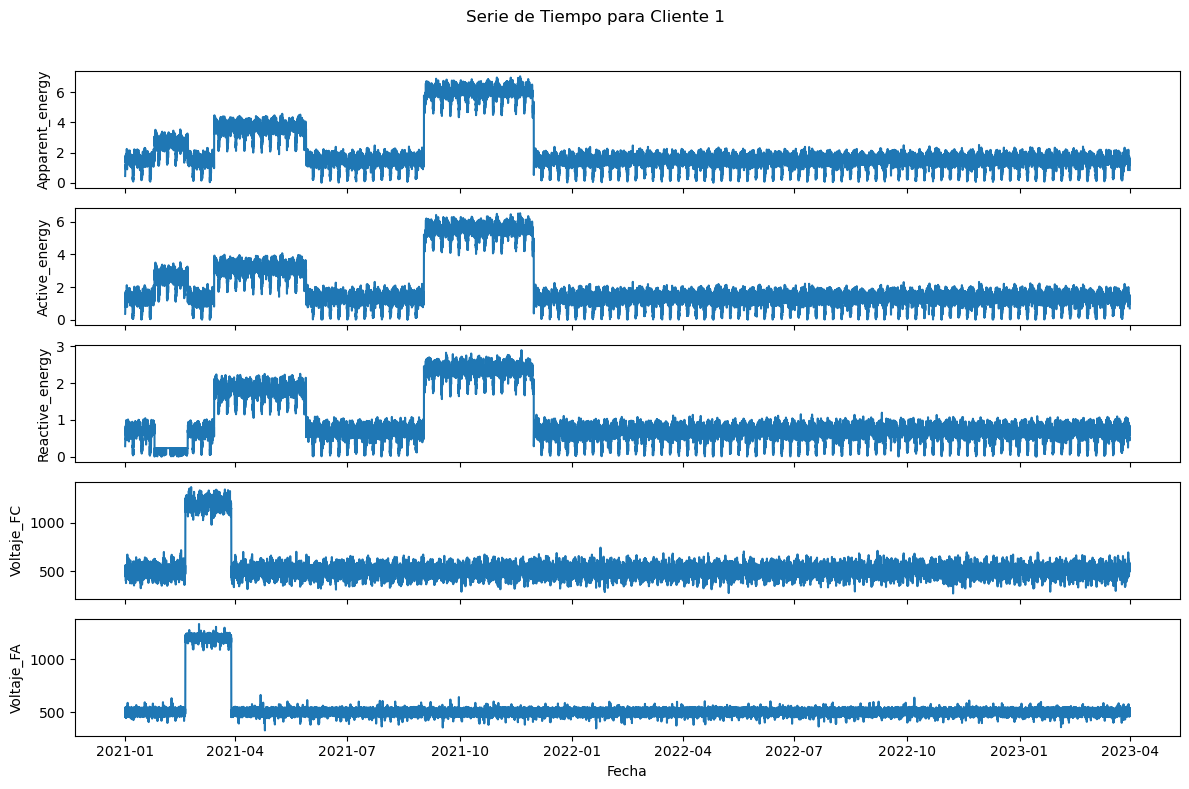

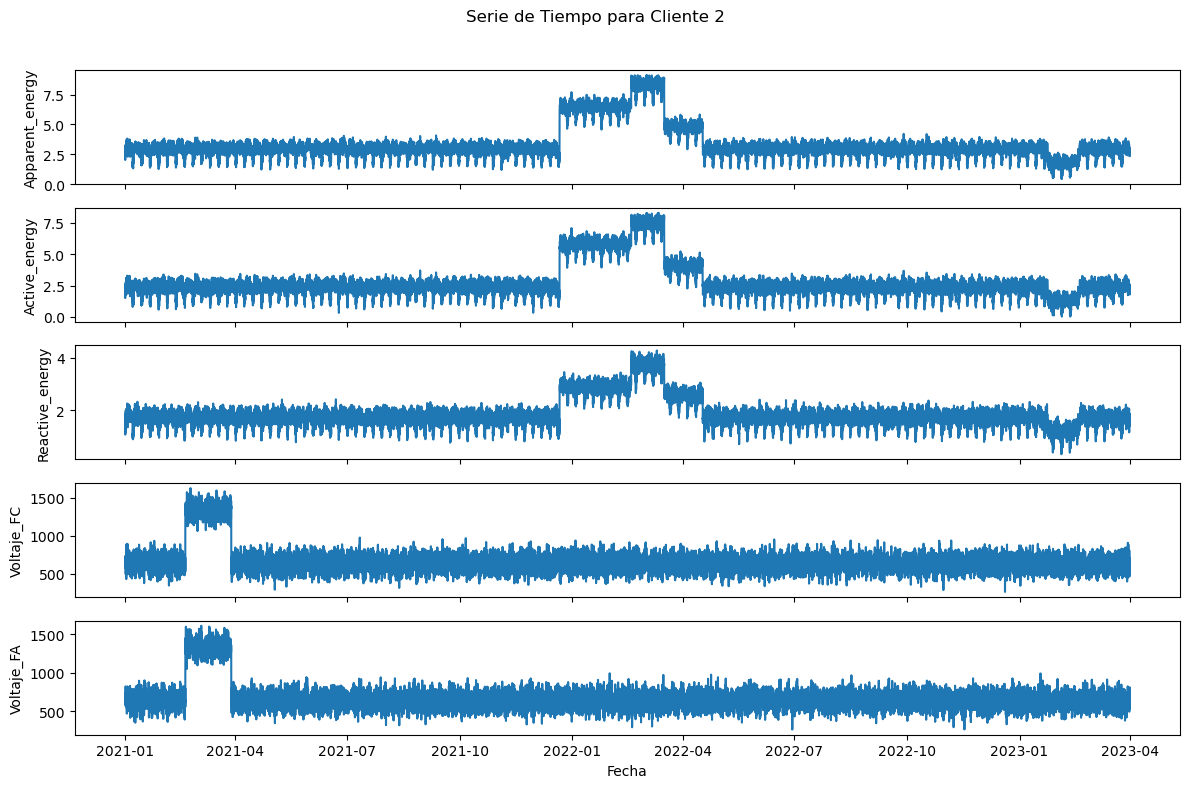

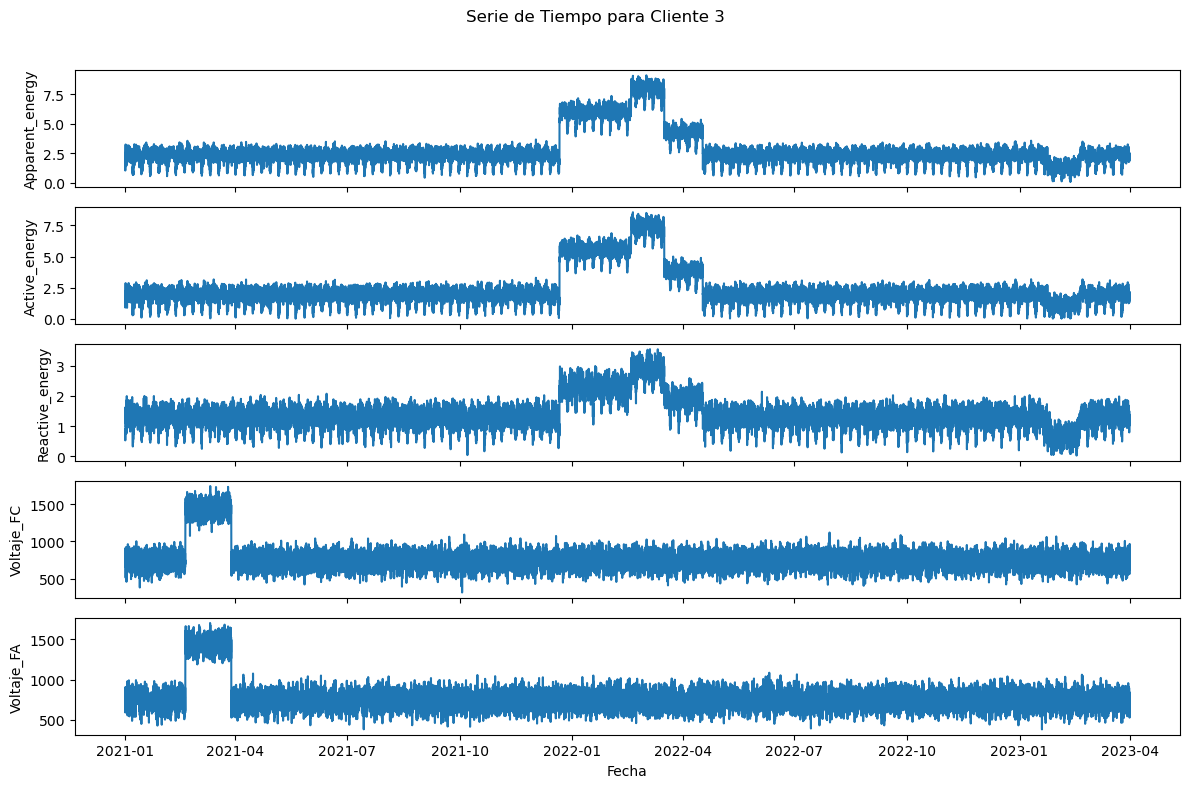

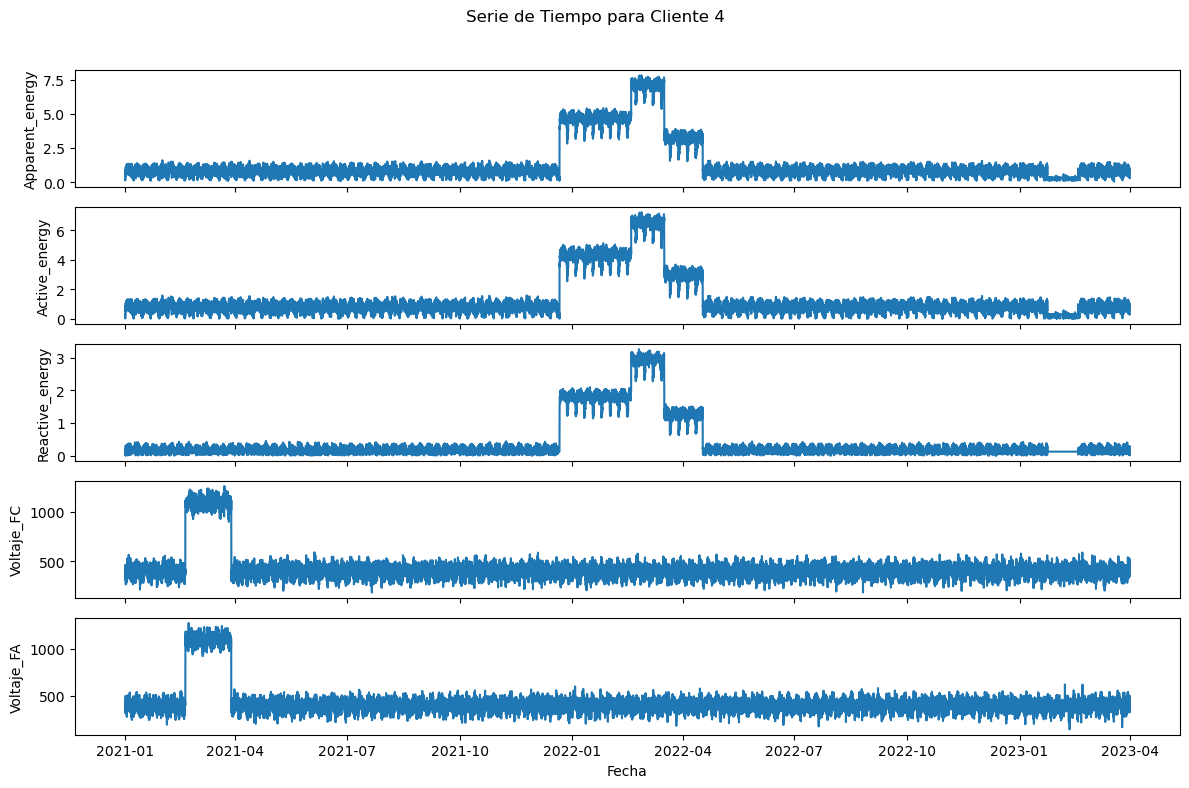

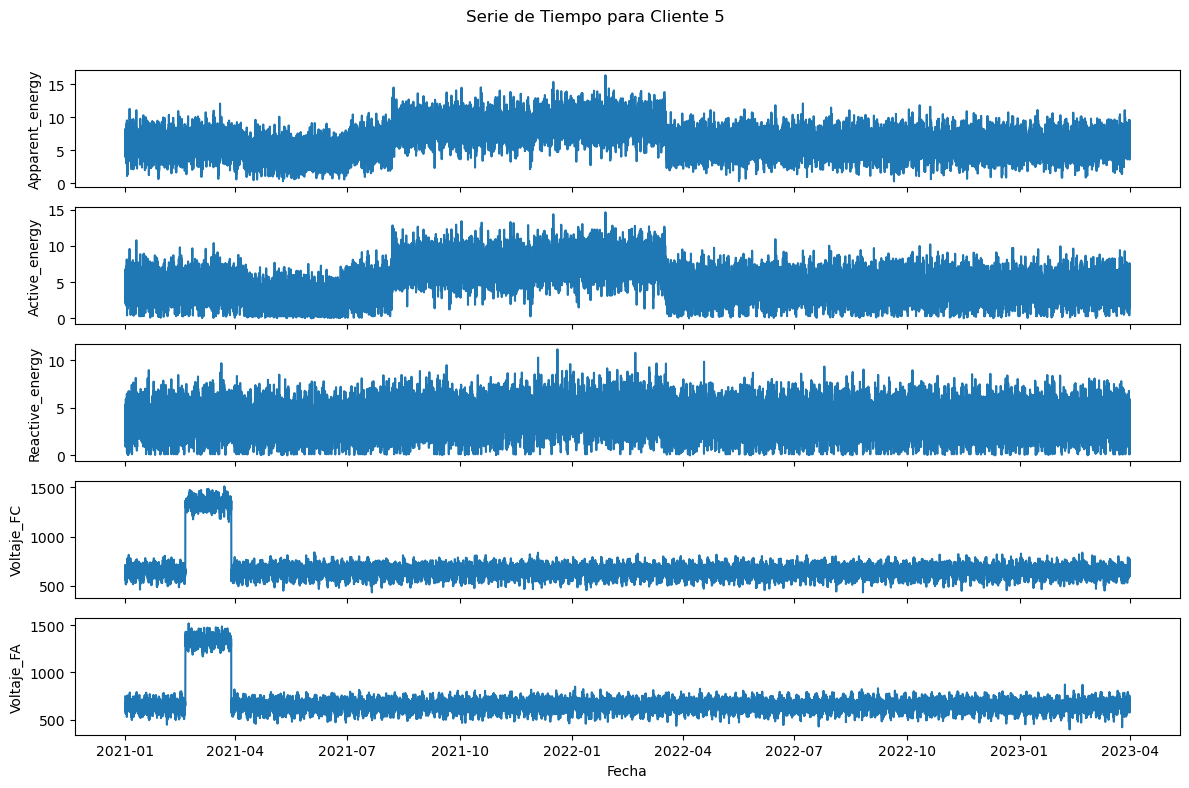

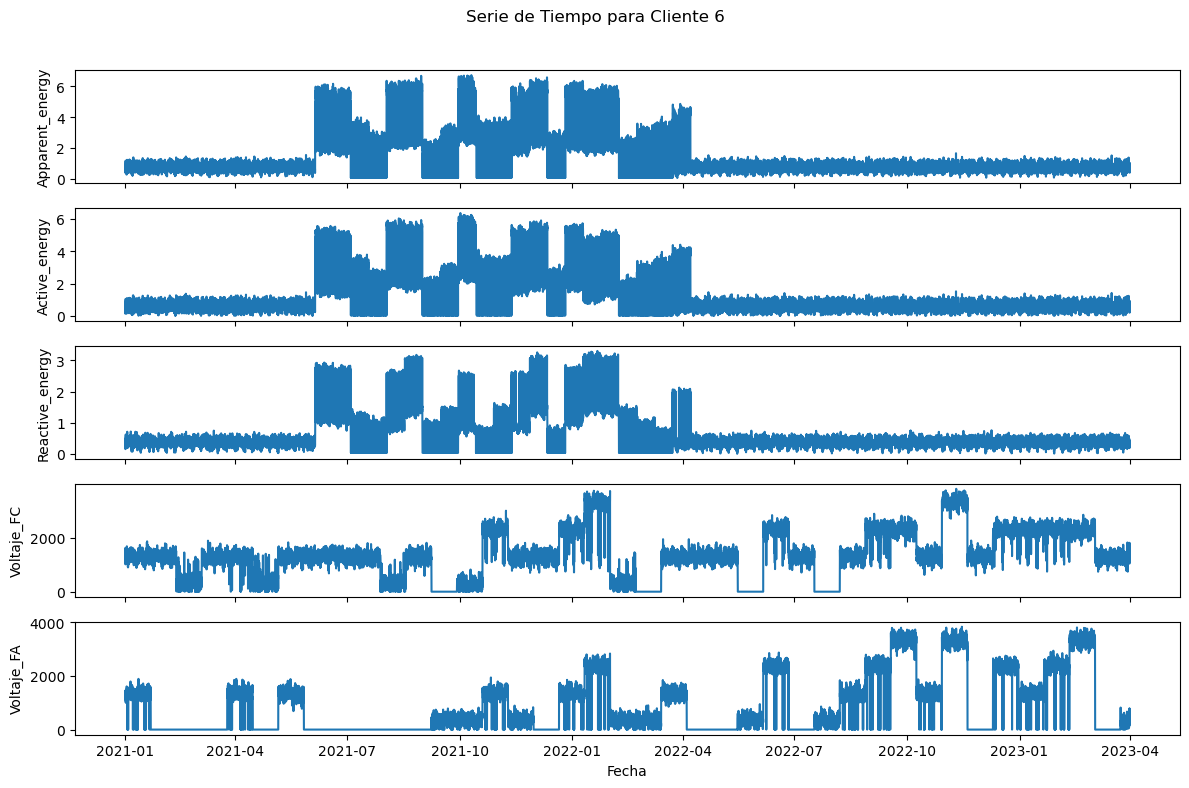

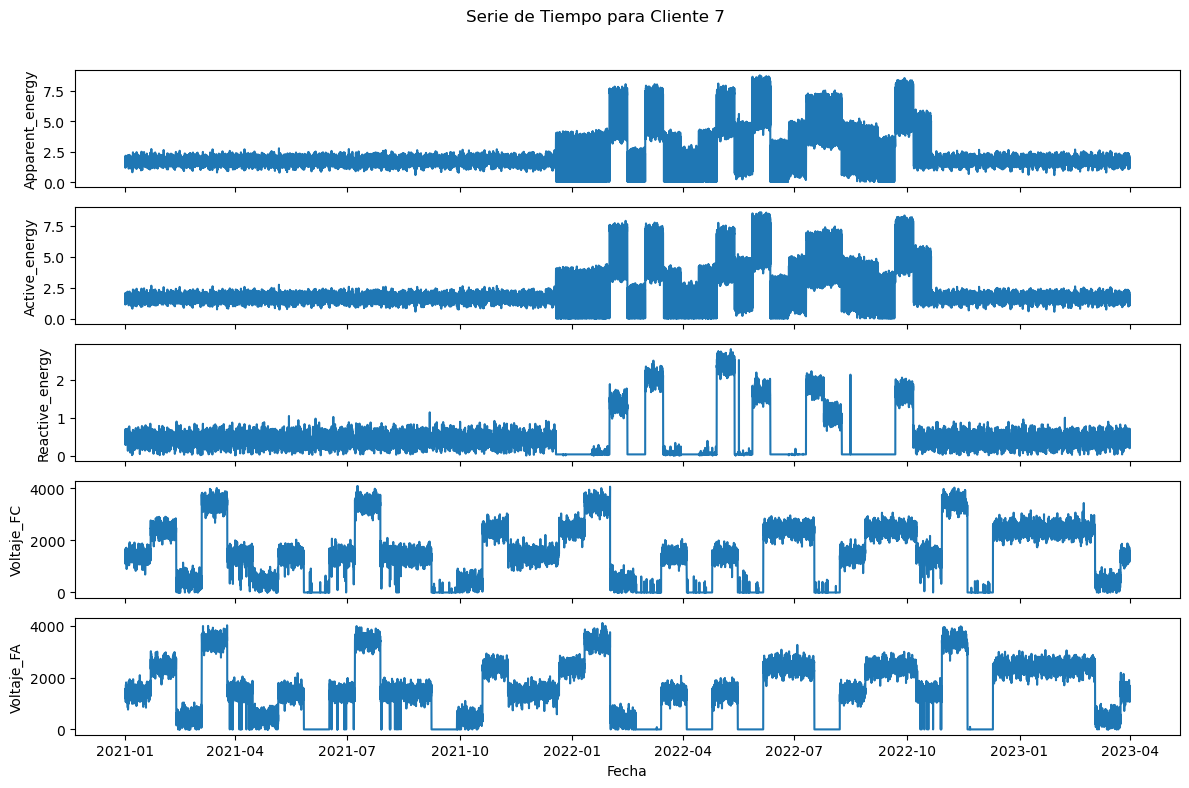

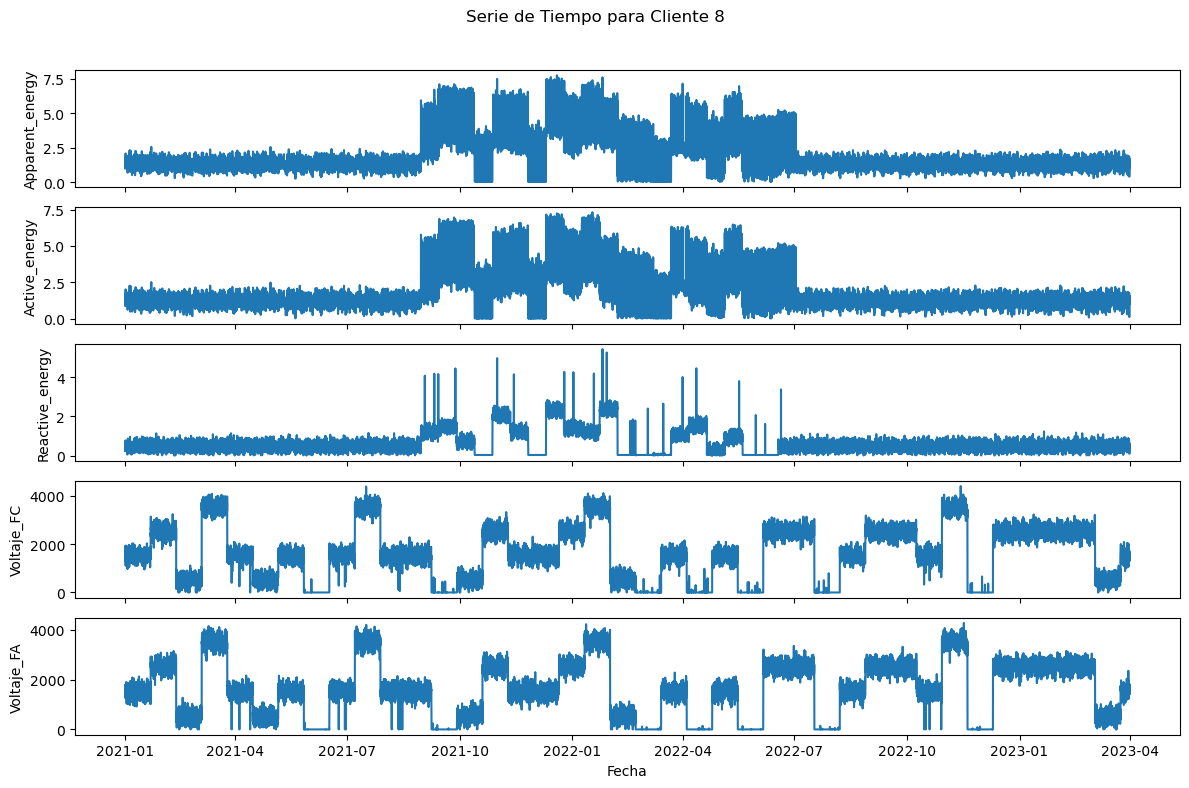

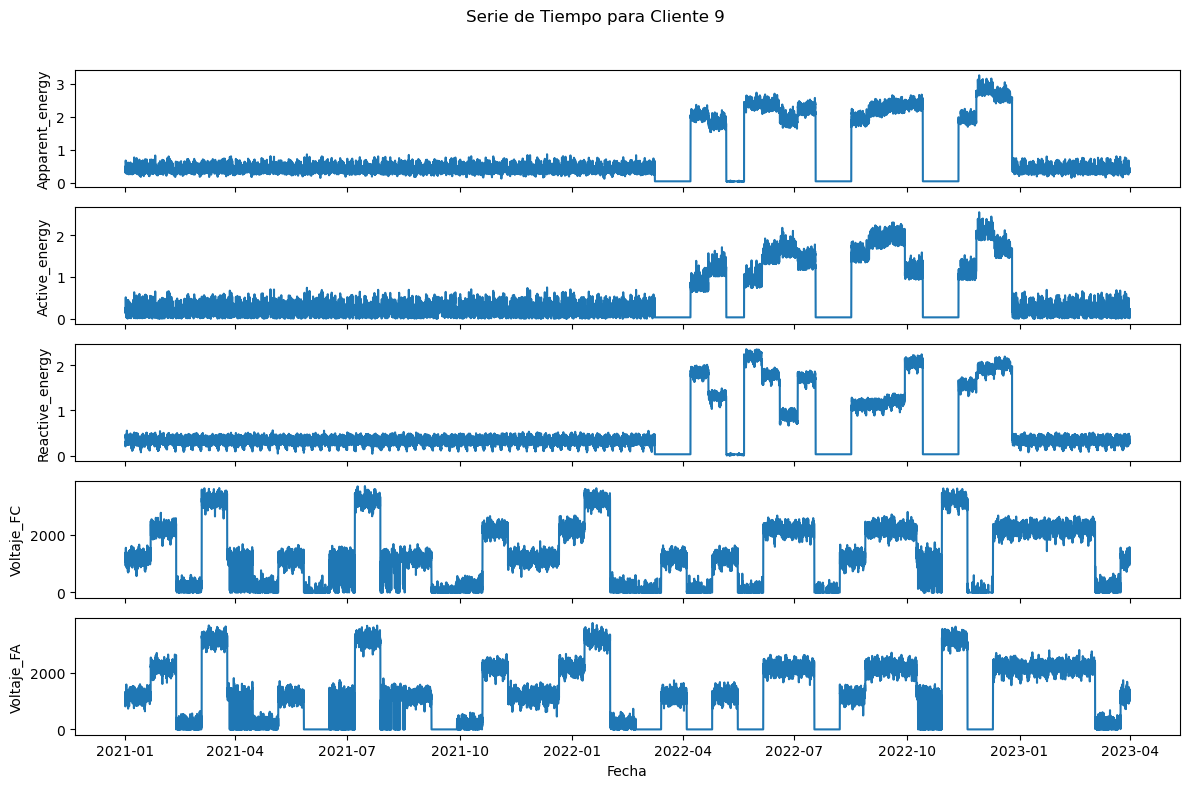

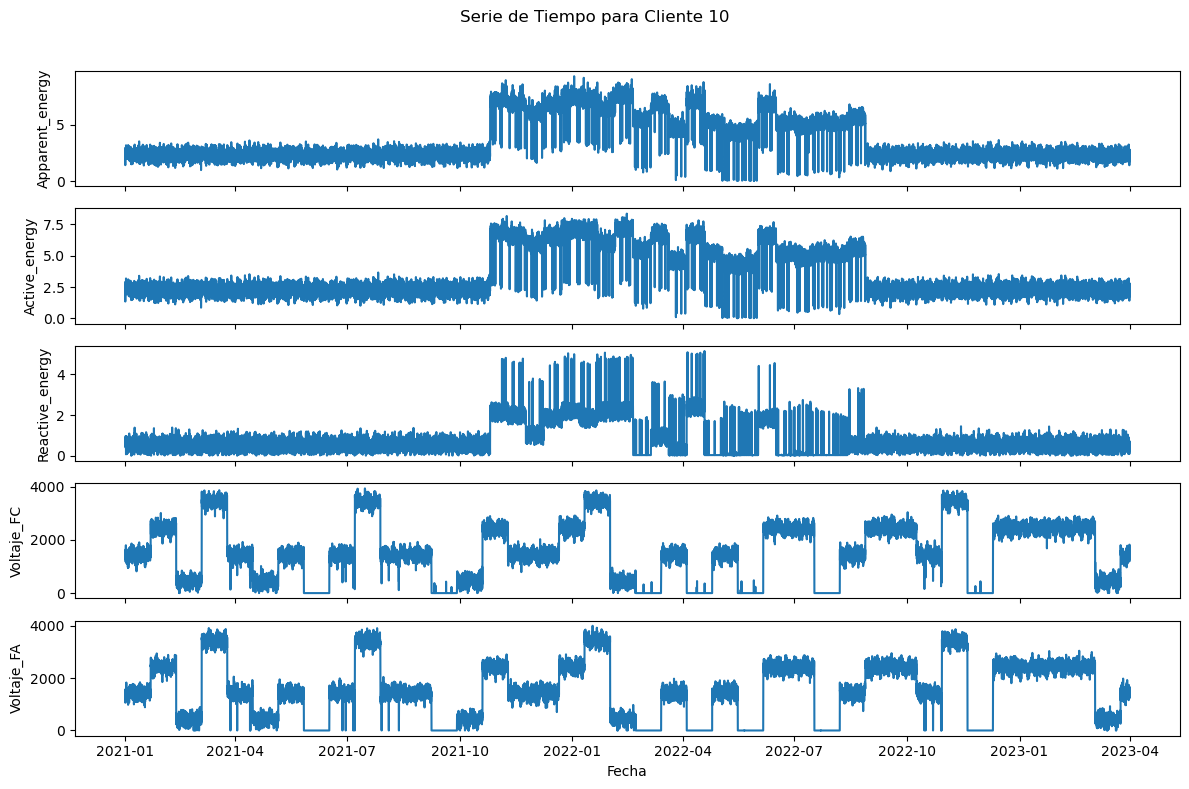

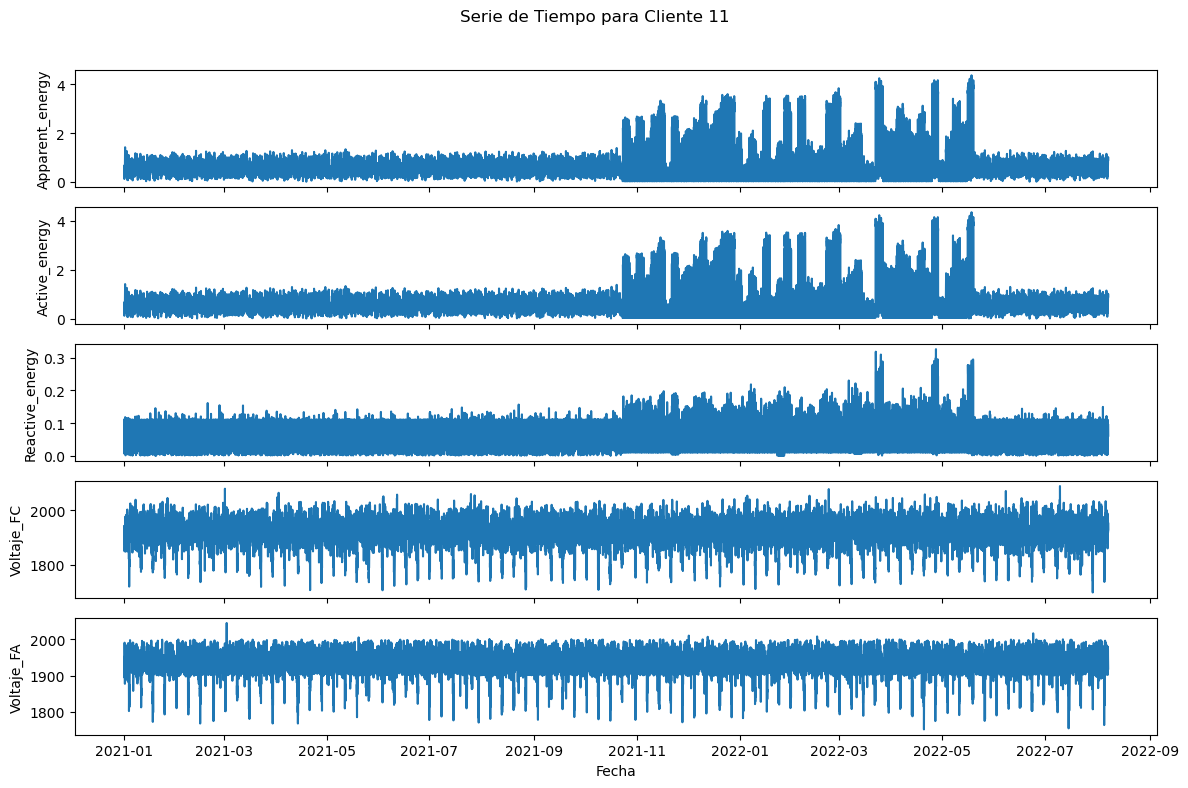

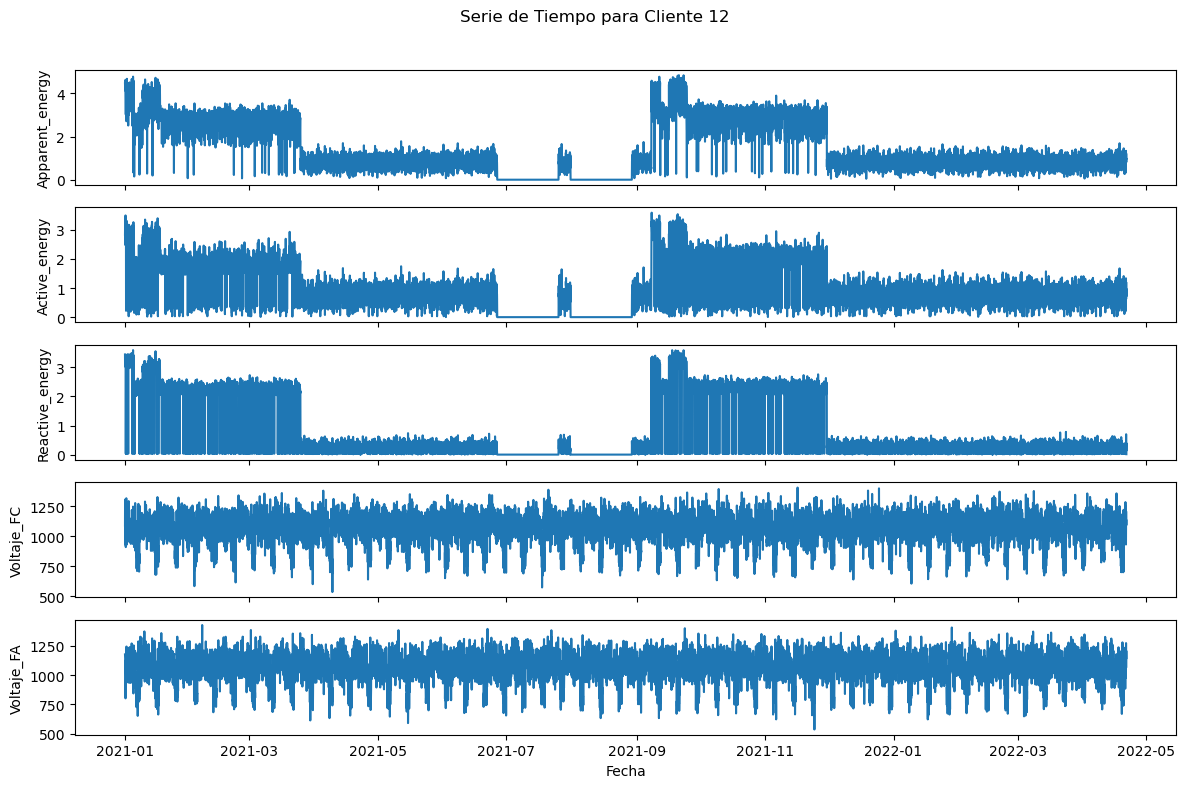

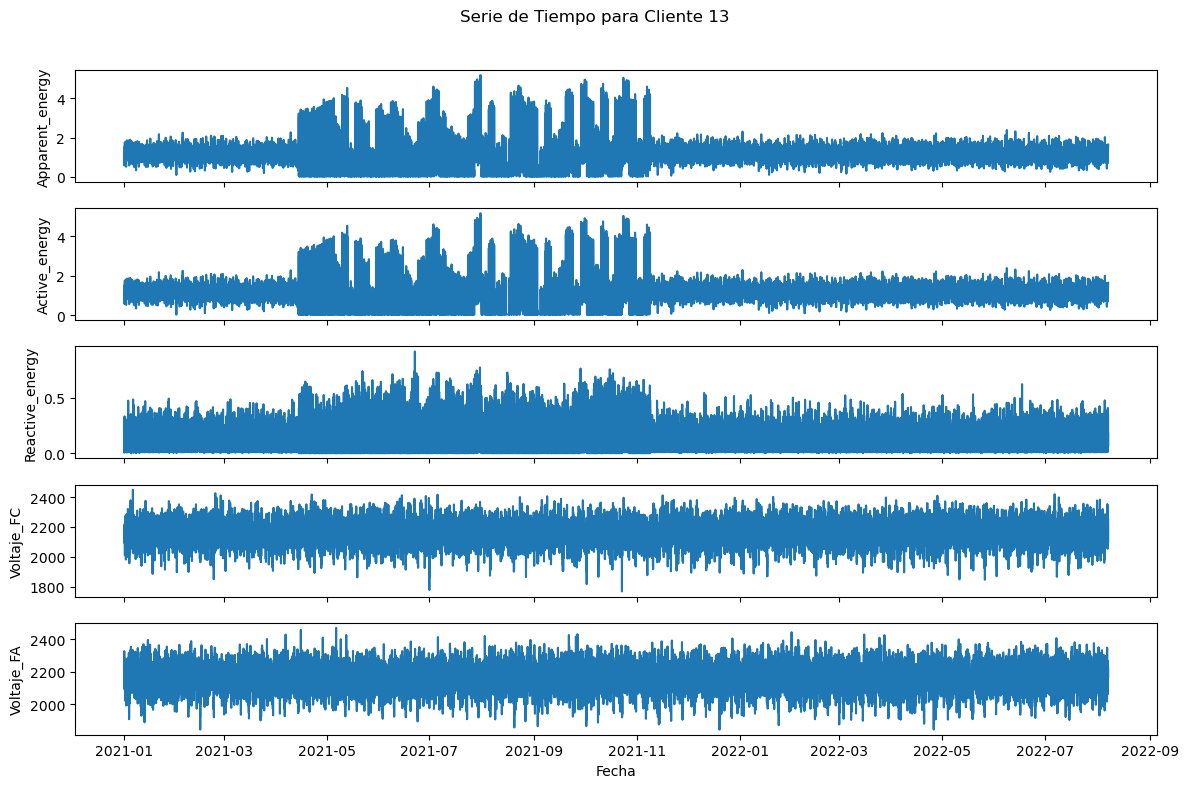

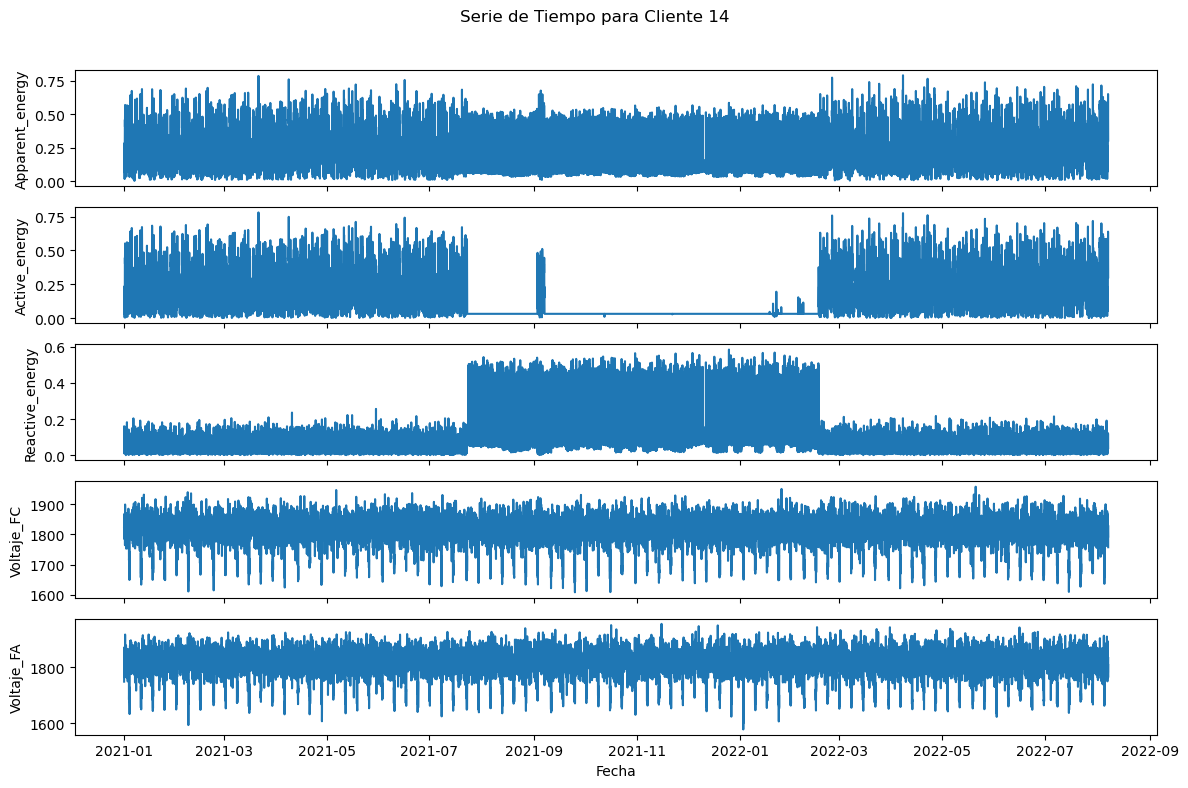

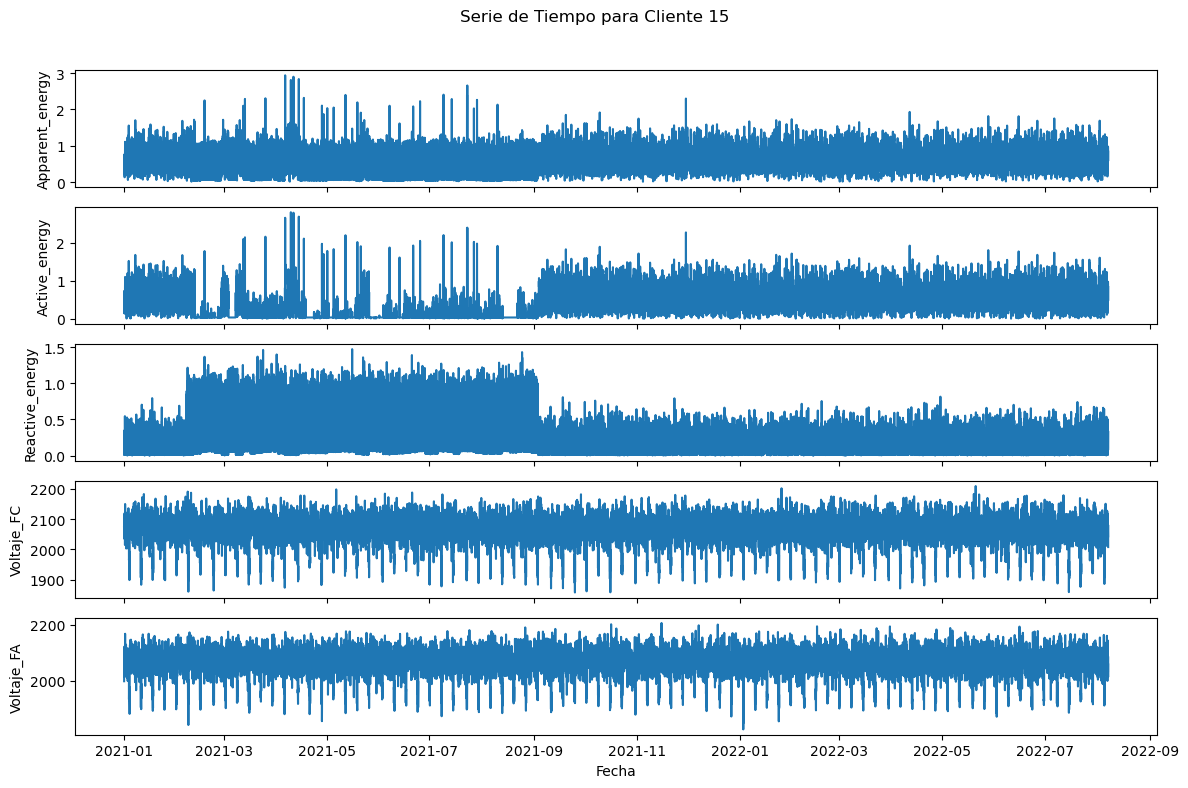

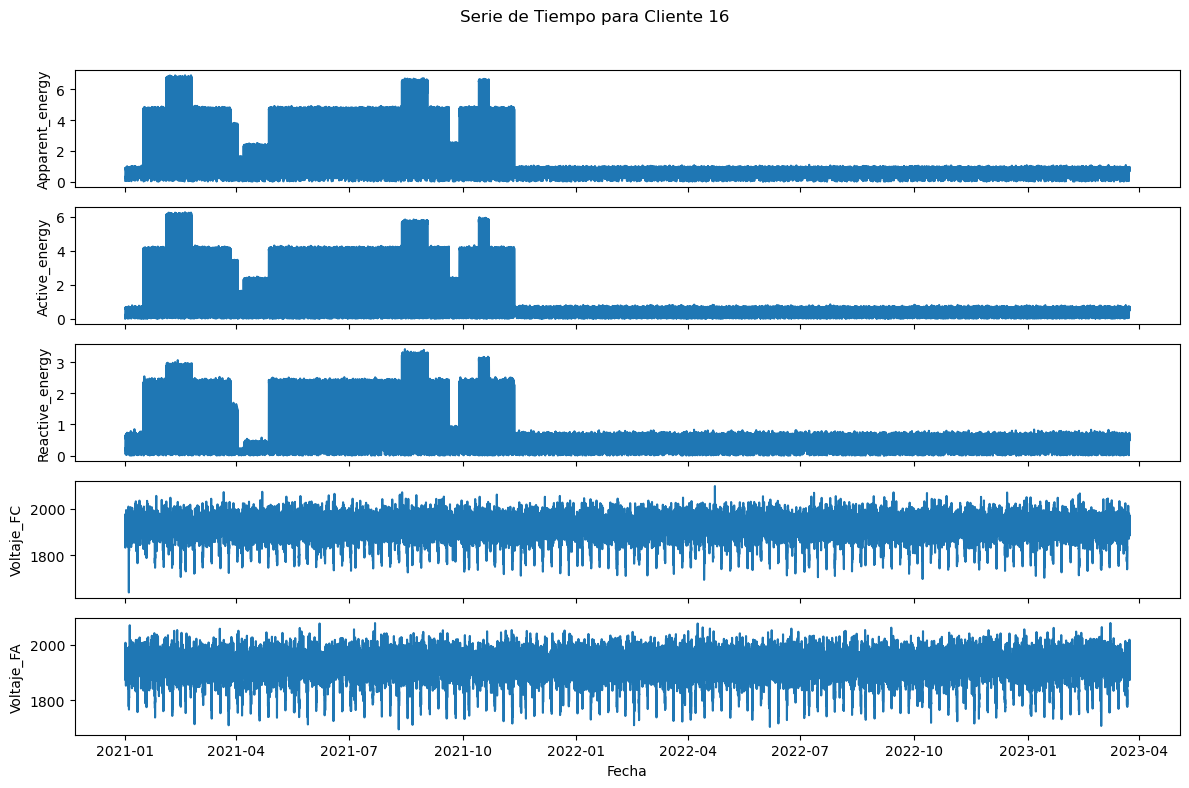

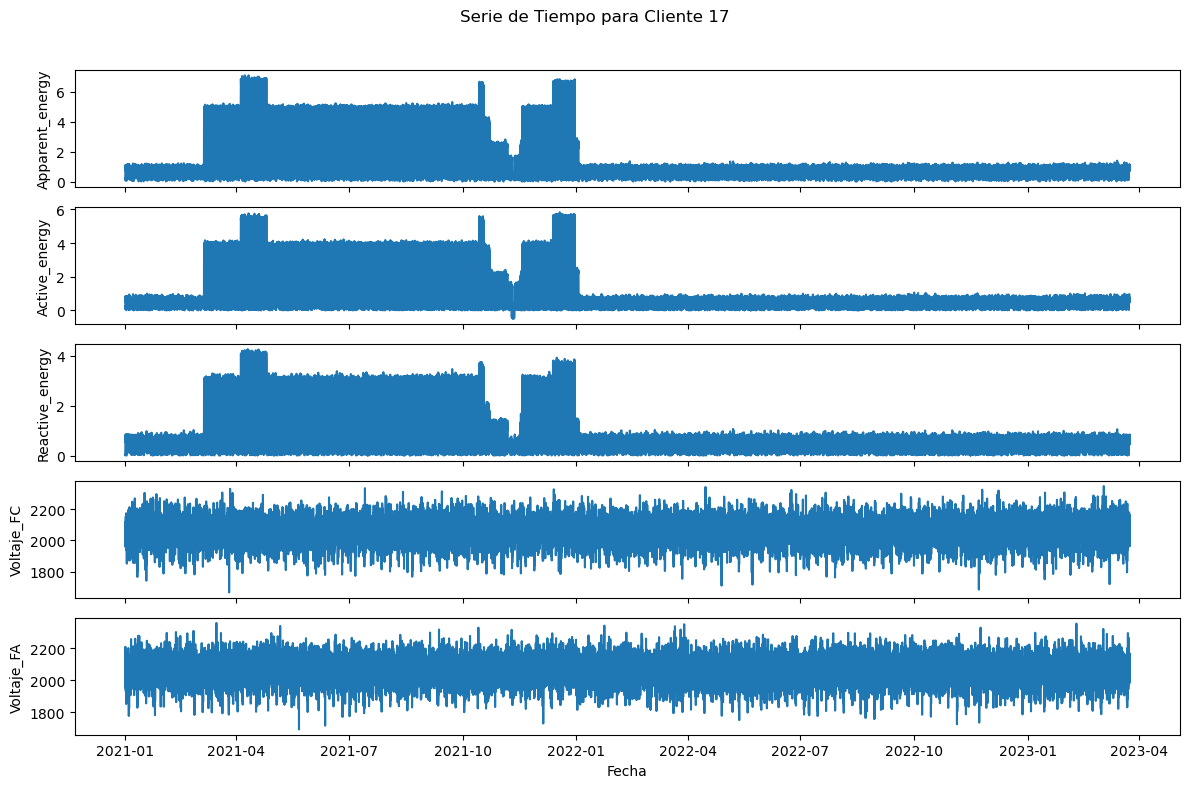

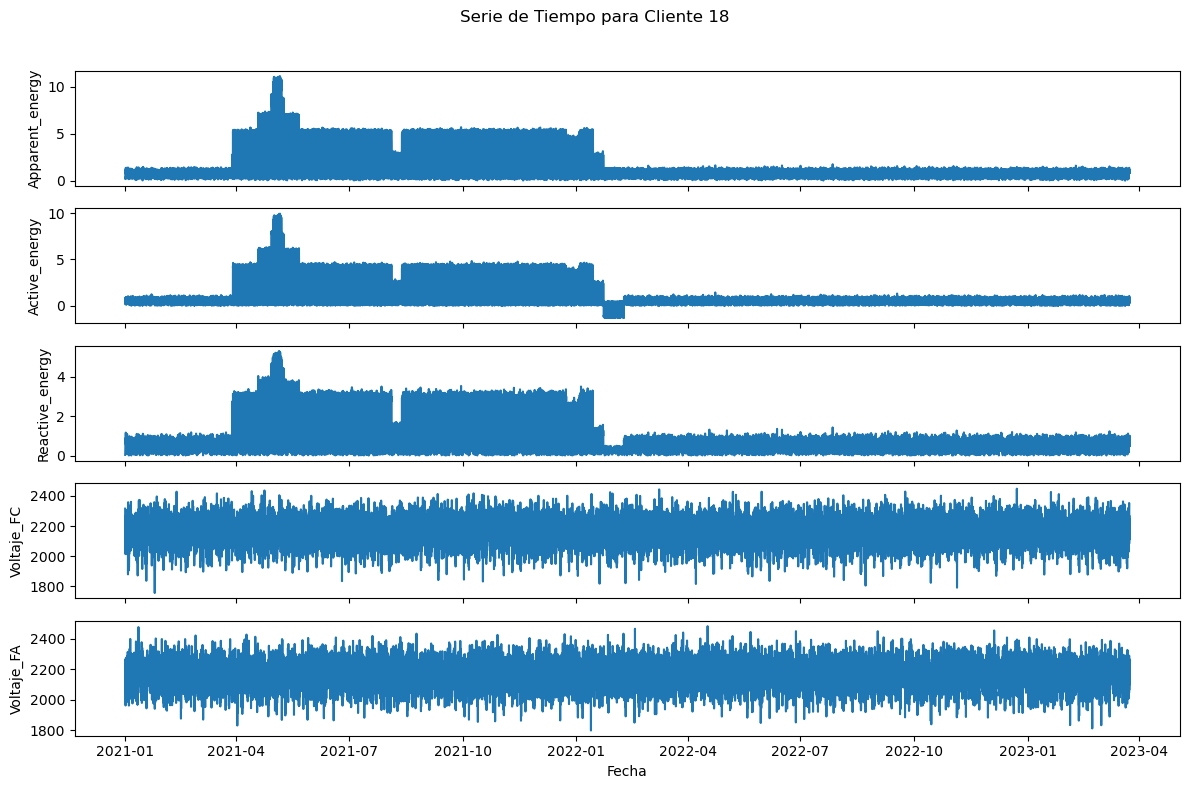

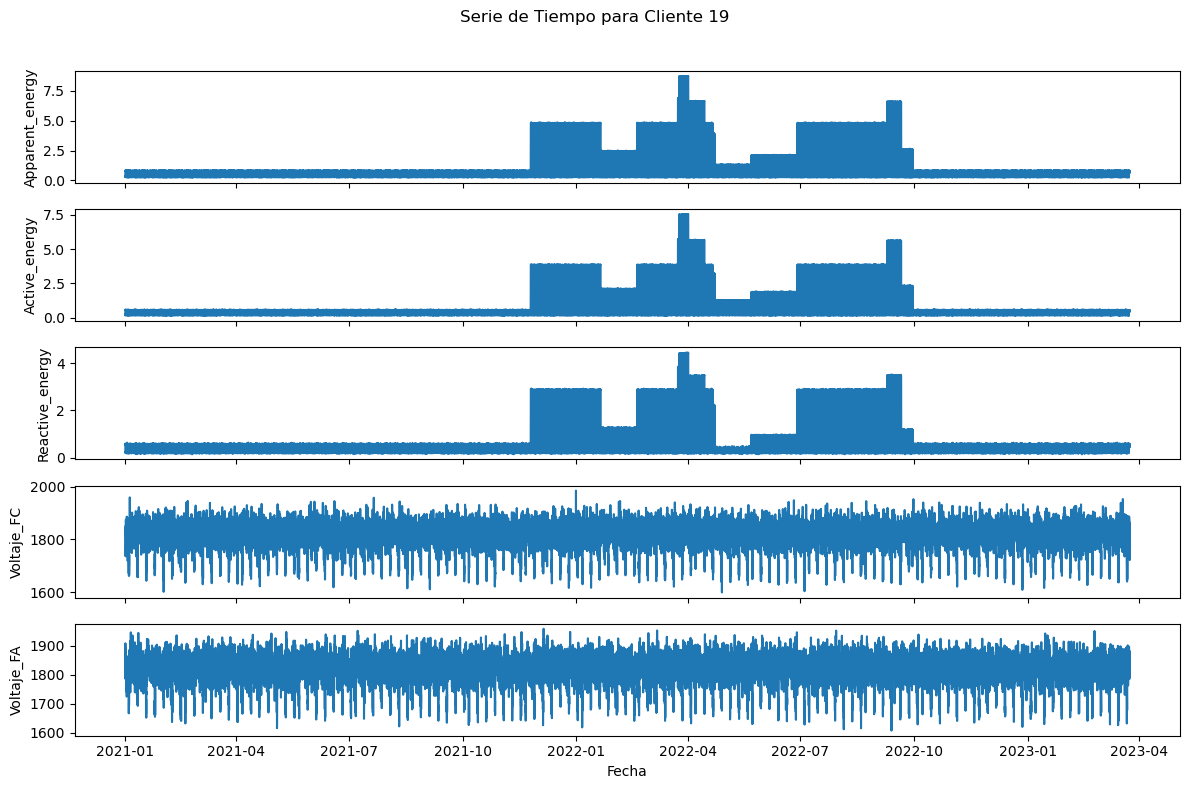

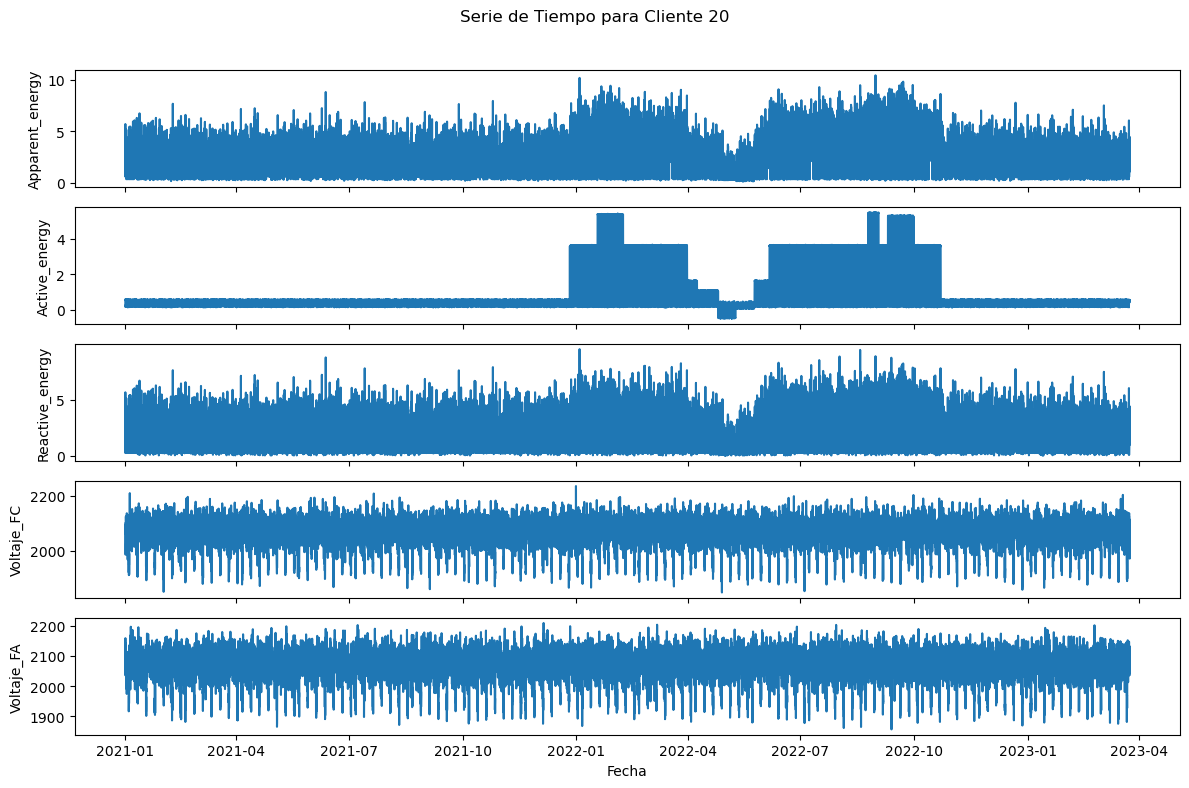

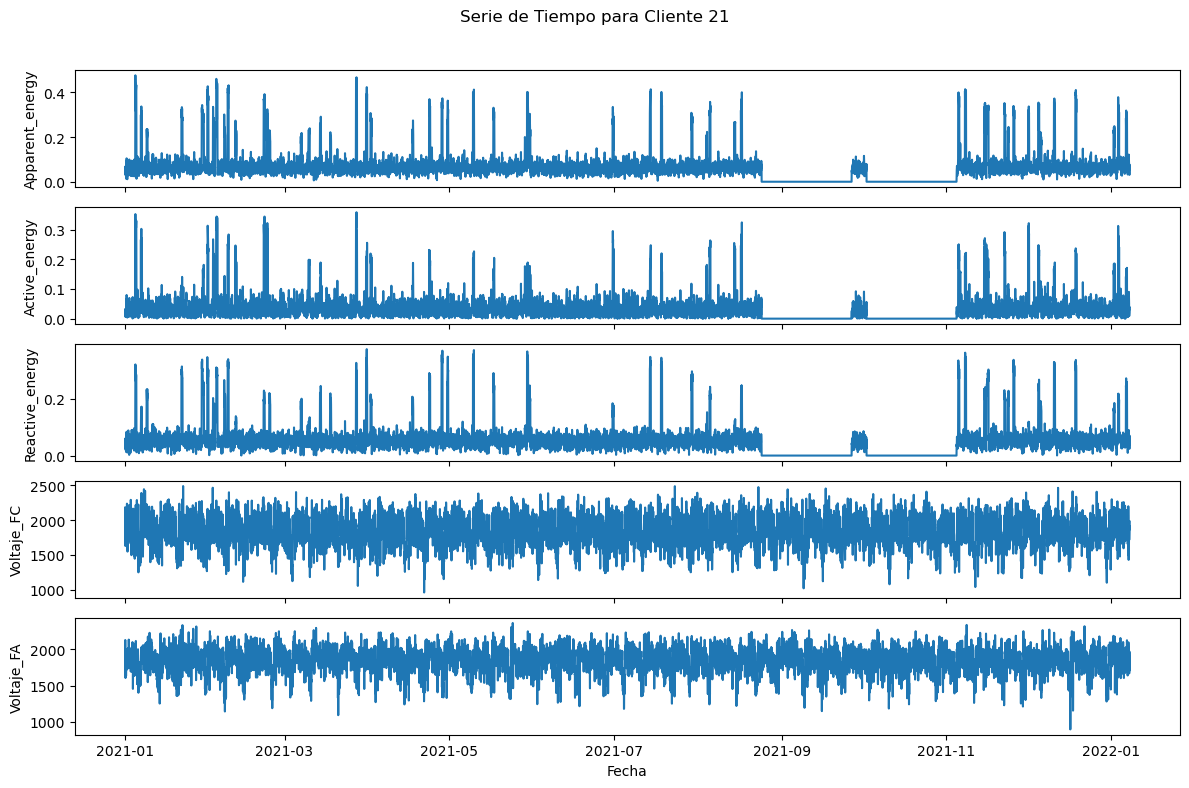

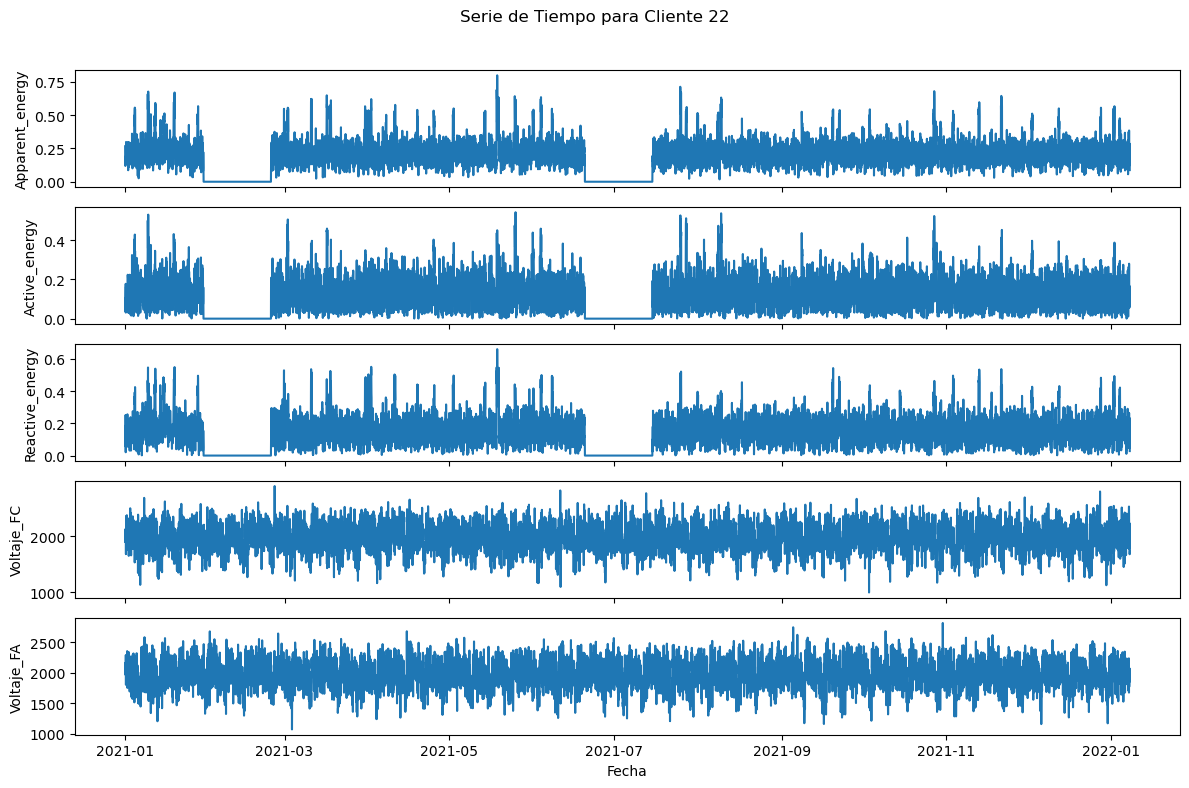

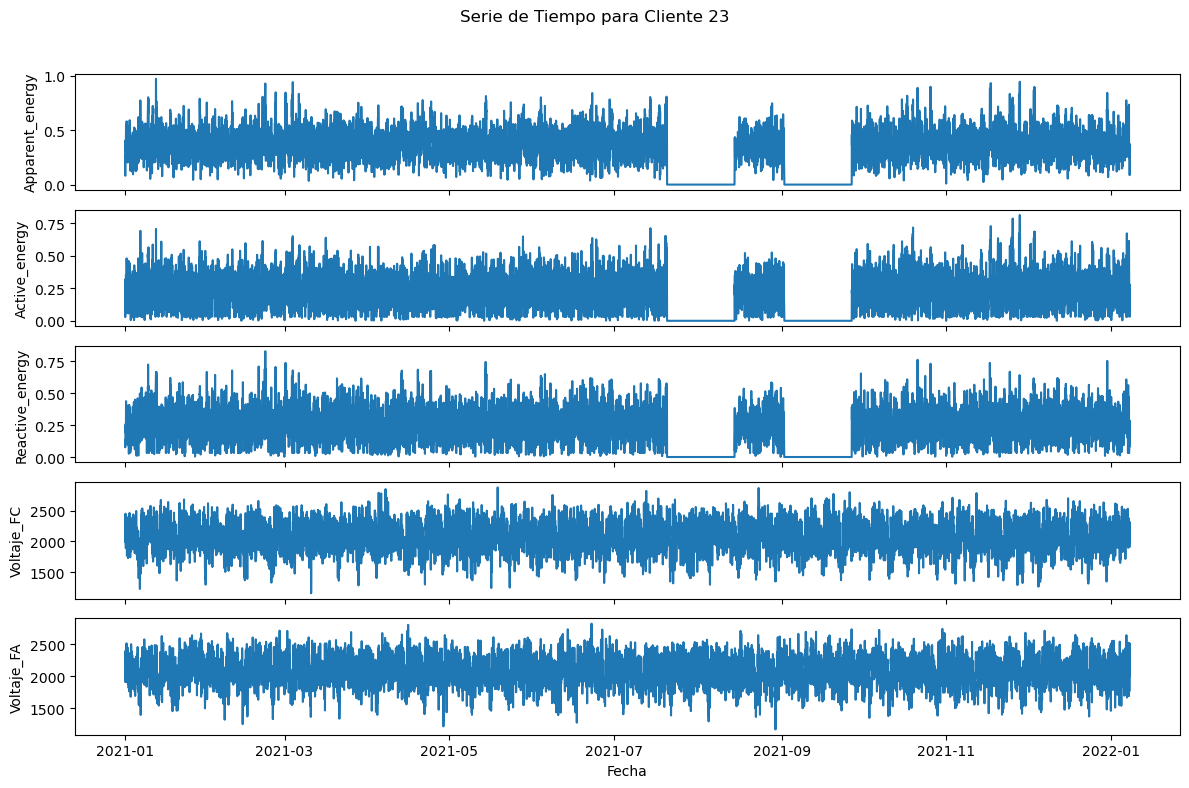

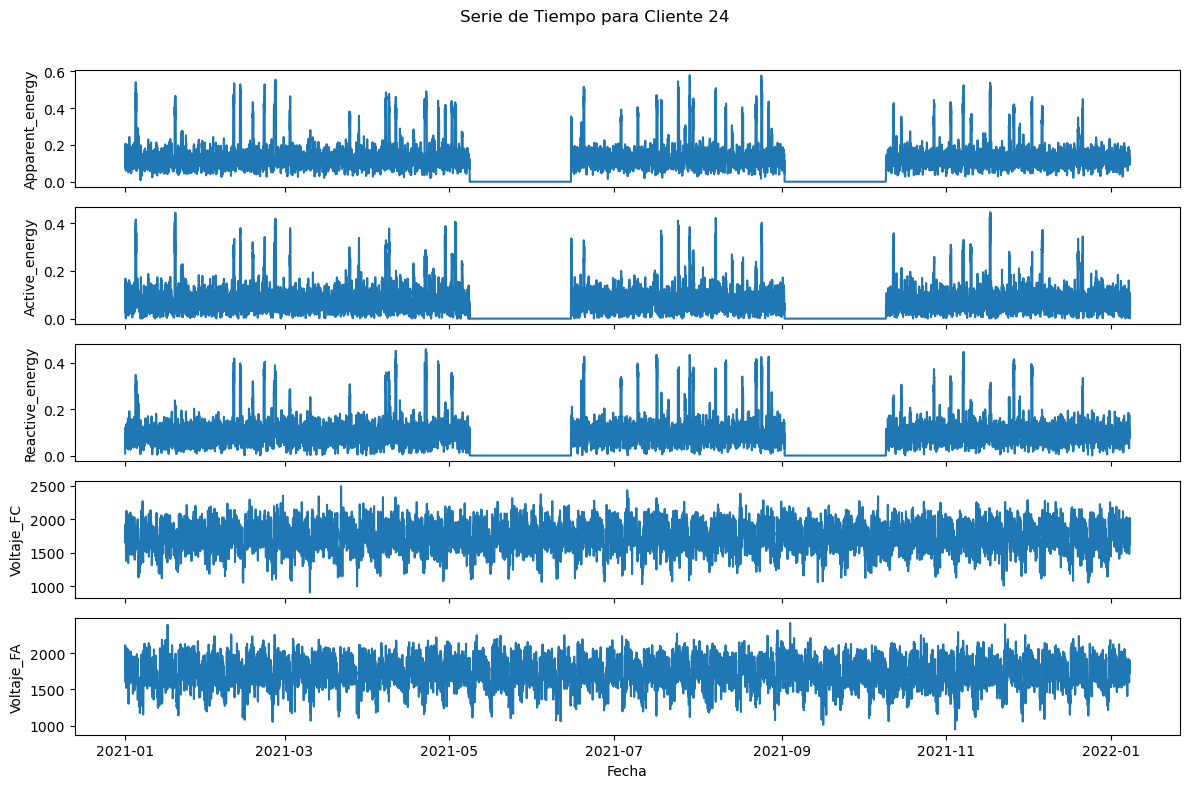

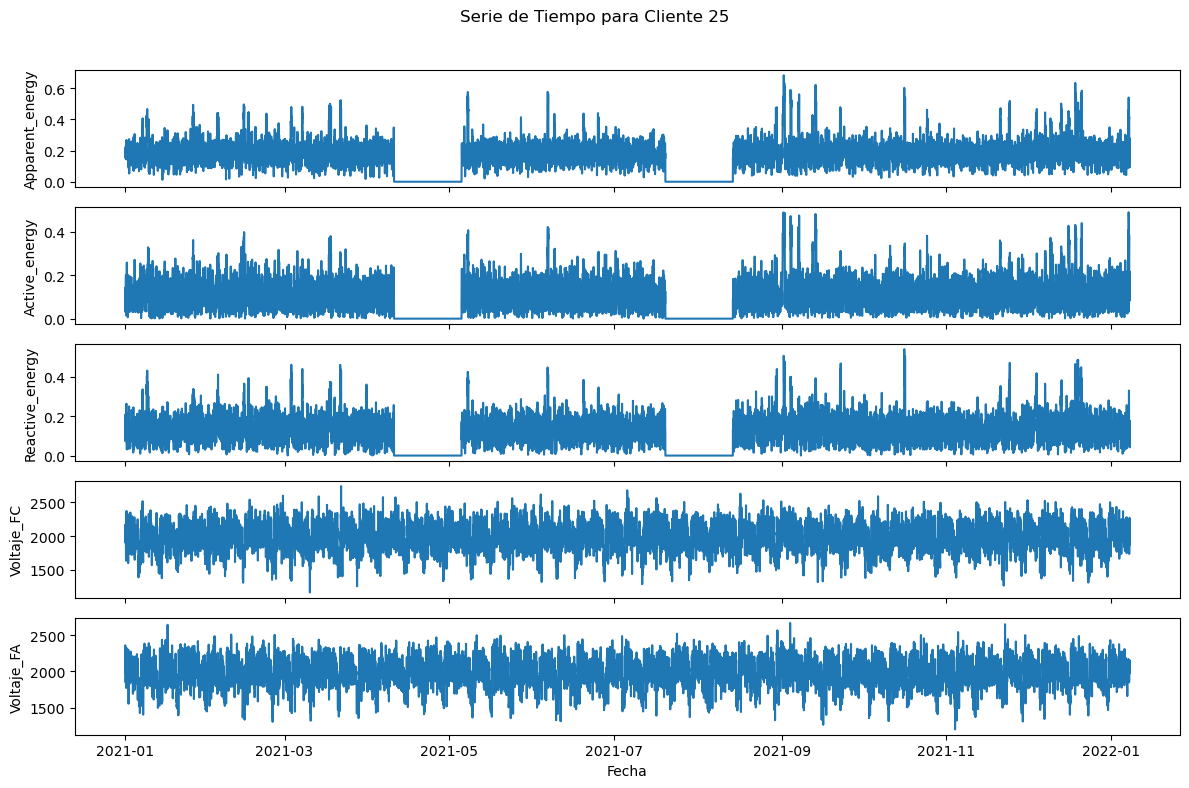

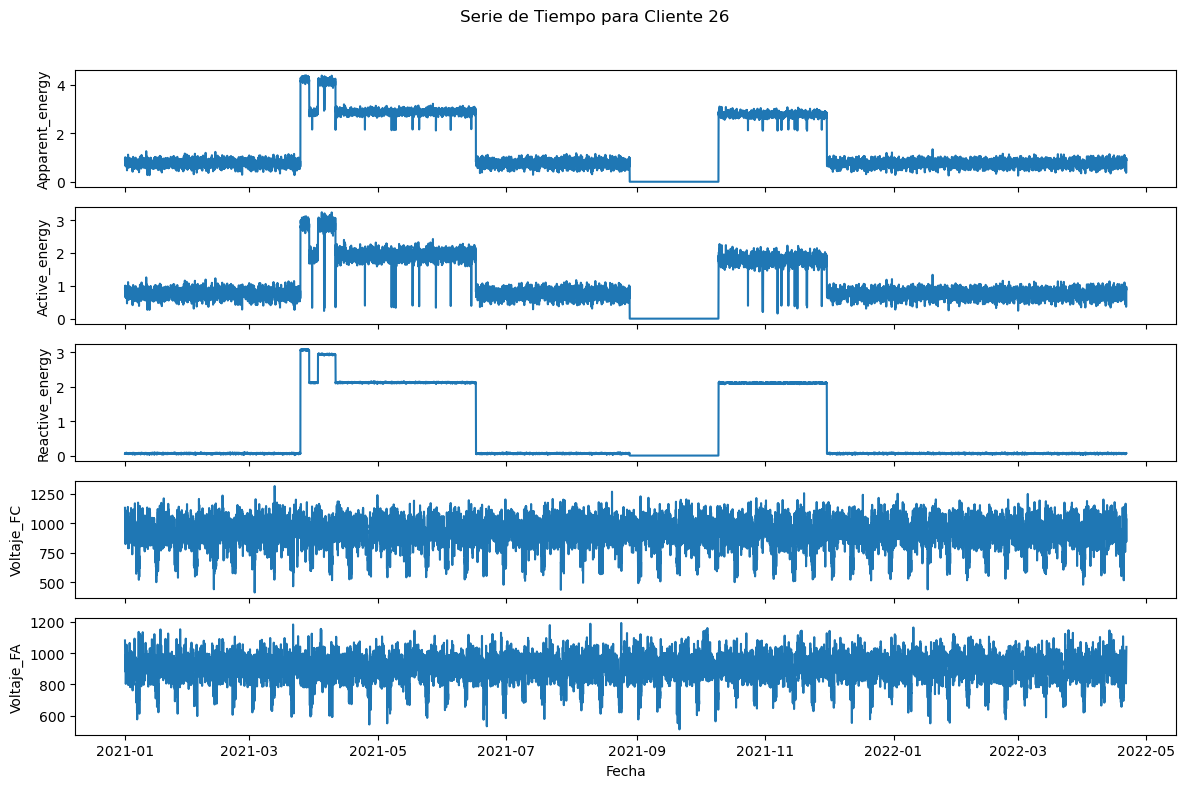

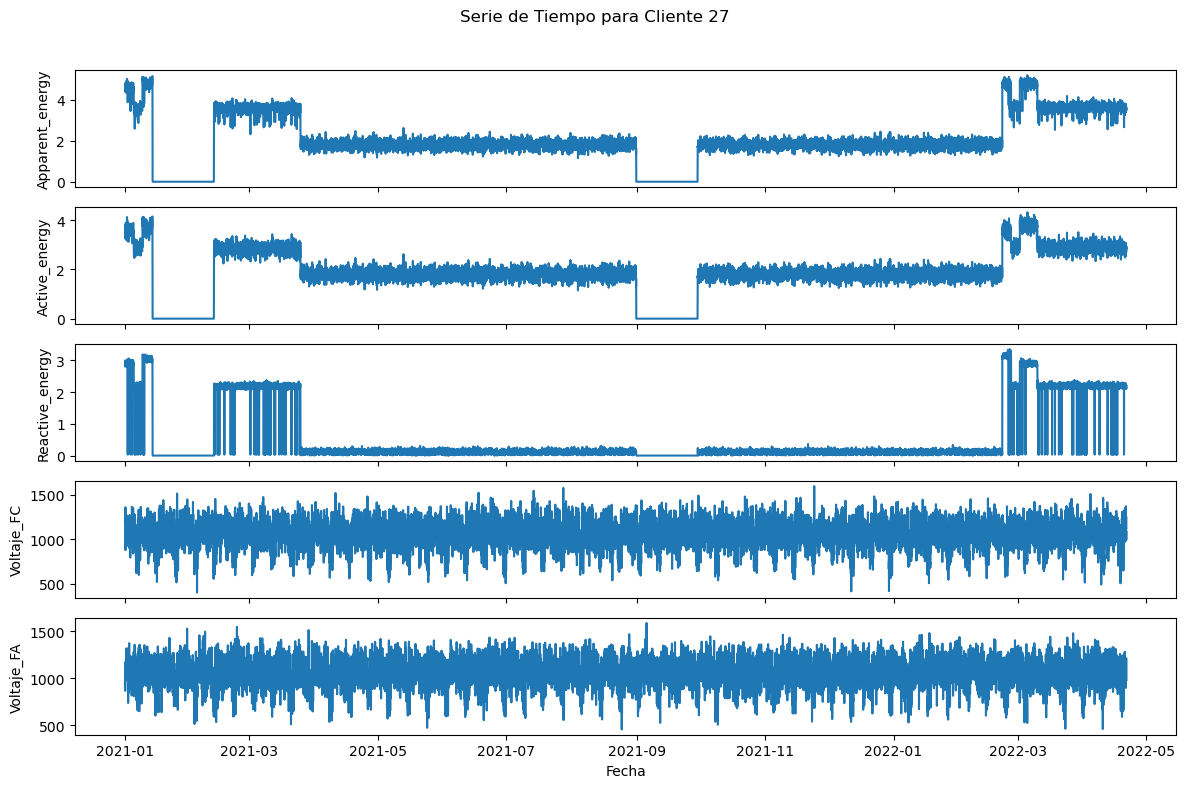

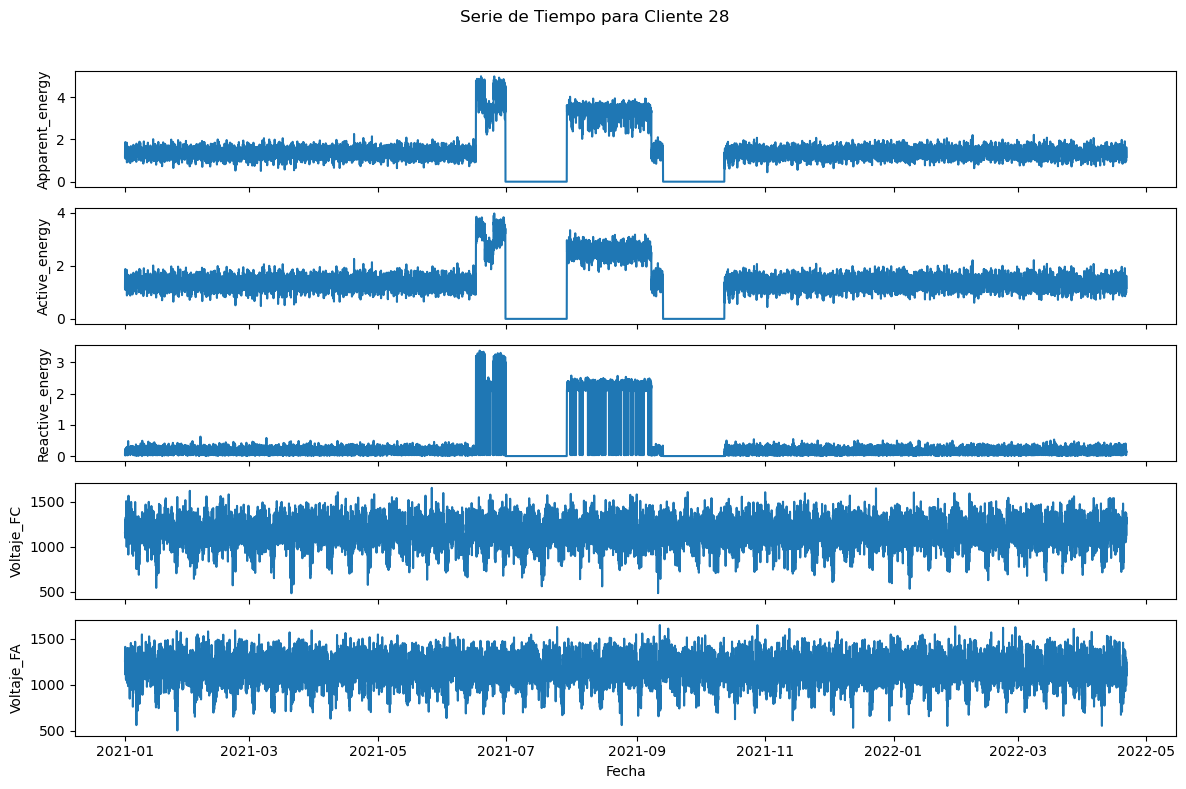

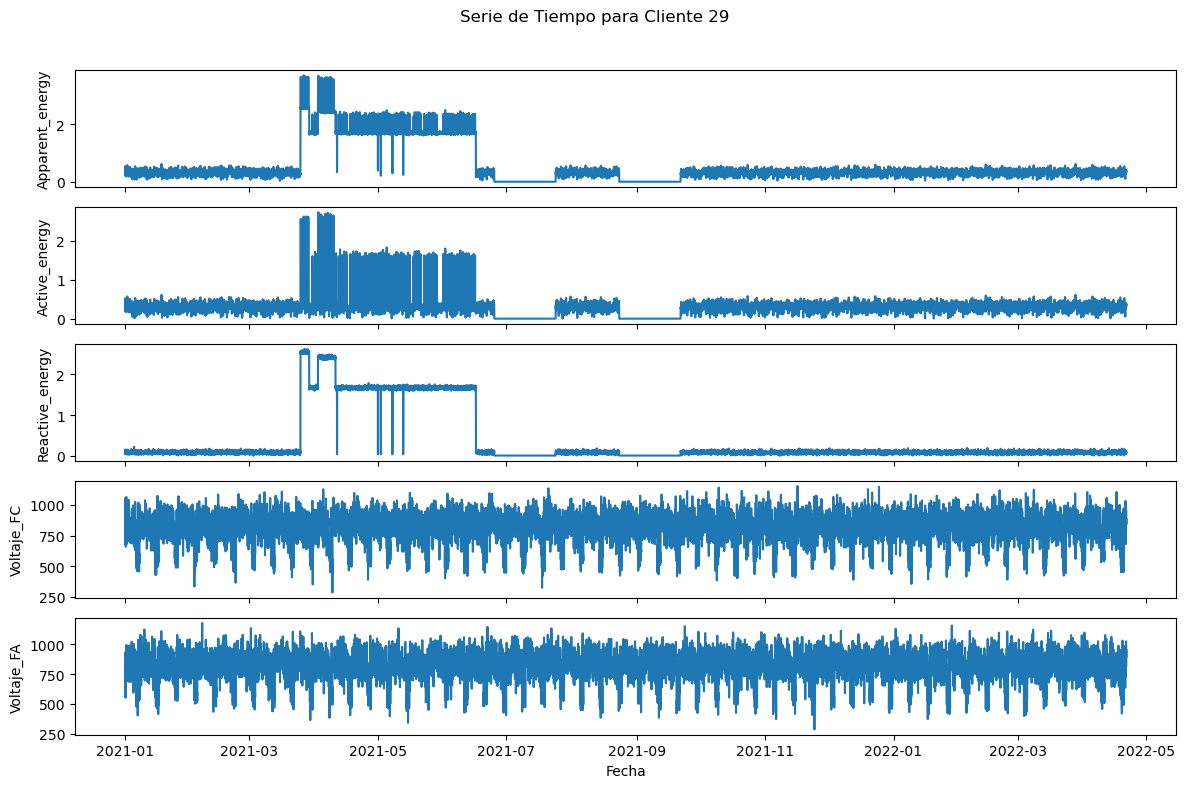

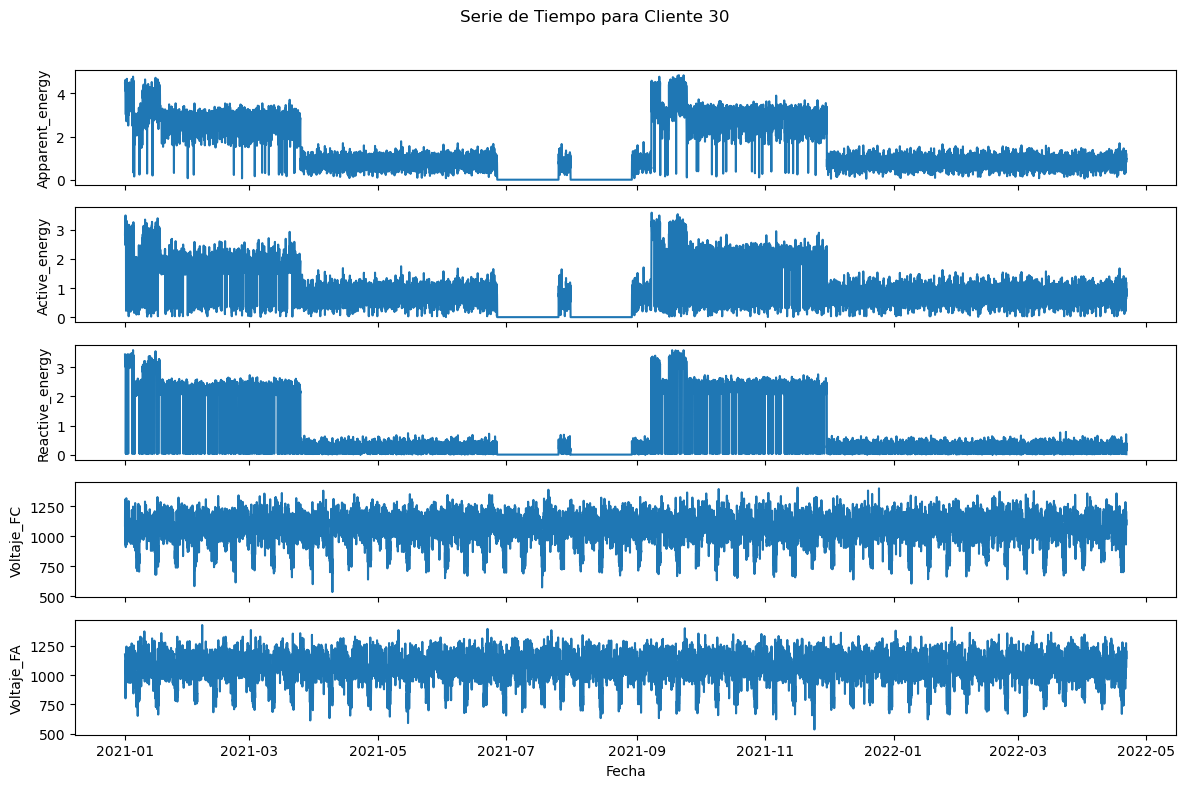

In [ ]:
# Para cada Cliente_ID, crea un conjunto de gráficas
for cliente_id in sorted(df_resultado['Cliente_ID'].unique()):
    # Filtra el DataFrame por el Cliente_ID actual
    df_cliente = df_resultado[df_resultado['Cliente_ID'] == cliente_id]

    # Crea una figura con cuatro subgráficos
    fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 8), sharex=True)
    fig.suptitle(f'Serie de Tiempo para Cliente {cliente_id}')

    # Itera sobre las columnas a graficar
    columns_to_plot = ['Apparent_energy','Active_energy','Reactive_energy','Voltaje_FC', 'Voltaje_FA']
    for i, col in enumerate(columns_to_plot):
        axs[i].plot(df_cliente['Fecha'], df_cliente[col])
        axs[i].set_ylabel(col)

    # Ajusta el diseño de las subgráficas
    plt.xlabel('Fecha')
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Muestra las gráficas
    plt.show()

##### HORAS DE MAYOR CONSUMO PROMEDIO

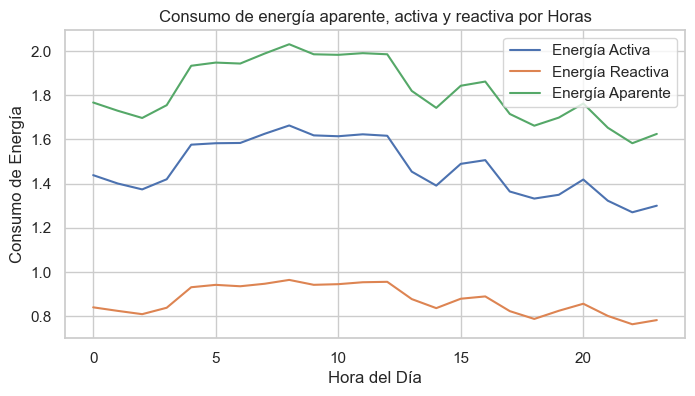

In [ ]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura y ejes
plt.figure(figsize=(8, 4))

# Grafica
sns.lineplot(x='Hora', y='Active_energy', data=df_resultado, label='Energía Activa', ci=None)
sns.lineplot(x='Hora', y='Reactive_energy', data=df_resultado, label='Energía Reactiva', ci=None)
sns.lineplot(x='Hora', y='Apparent_energy', data=df_resultado, label='Energía Aparente', ci=None)

plt.title('Consumo de energía aparente, activa y reactiva por Horas')
plt.xlabel('Hora del Día')
plt.ylabel('Consumo de Energía')

plt.legend()

plt.show()

##### DÍA DE LA SEMANA DE MAYOR CONSUMO PROMEDIO

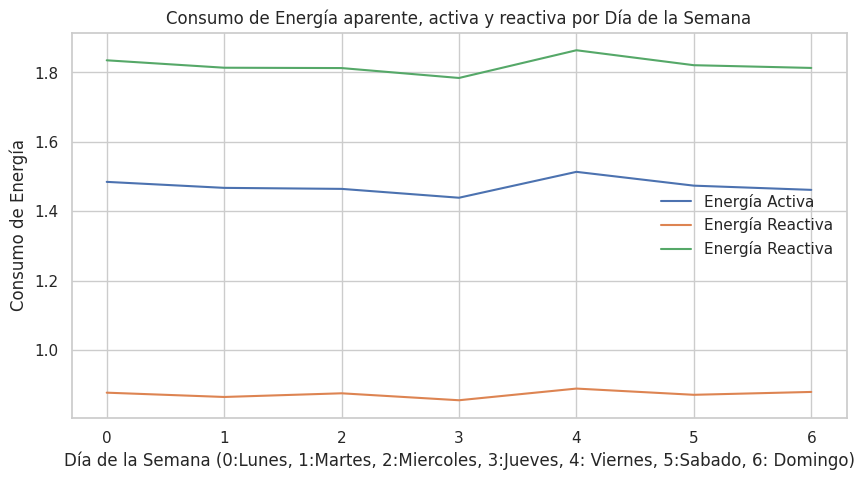

In [224]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura y ejes
plt.figure(figsize=(10, 5))

# Grafica
sns.lineplot(x='Dia_Semana_Num', y='Active_energy', data=df_resultado, label='Energía Activa', ci=None)
sns.lineplot(x='Dia_Semana_Num', y='Reactive_energy', data=df_resultado, label='Energía Reactiva', ci=None)
sns.lineplot(x='Dia_Semana_Num', y='Apparent_energy', data=df_resultado, label='Energía Reactiva', ci=None)

plt.title('Consumo de Energía aparente, activa y reactiva por Día de la Semana')
plt.xlabel('Día de la Semana (0:Lunes, 1:Martes, 2:Miercoles, 3:Jueves, 4: Viernes, 5:Sabado, 6: Domingo)')
plt.ylabel('Consumo de Energía')

plt.legend()

plt.show()

##### MESES DE MAYOR CONSUMO PROMEDIO

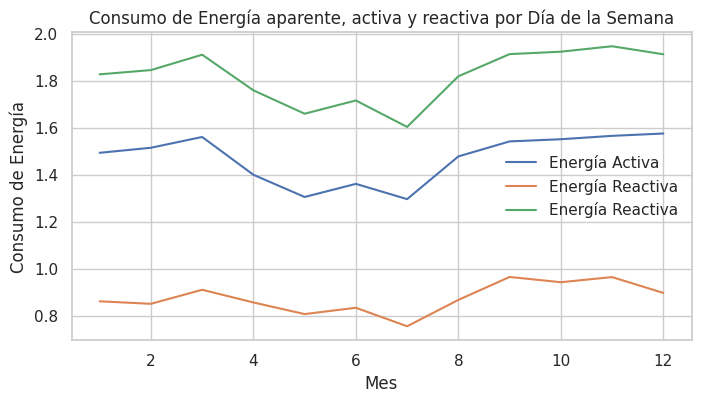

In [227]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura y ejes
plt.figure(figsize=(8, 4))

# Grafica
sns.lineplot(x='Mes', y='Active_energy', data=df_resultado, label='Energía Activa', ci=None)
sns.lineplot(x='Mes', y='Reactive_energy', data=df_resultado, label='Energía Reactiva', ci=None)
sns.lineplot(x='Mes', y='Apparent_energy', data=df_resultado, label='Energía Reactiva', ci=None)

plt.title('Consumo de Energía aparente, activa y reactiva por Día de la Semana')
plt.ylabel('Consumo de Energía')

plt.legend()

plt.show()

### Missing values

In [6]:
def generar_resumen_missing_values(dataframe):
    # Calcula la cantidad de valores faltantes por columna
    missing_values = dataframe.isnull().sum()

    # Calcula el porcentaje de valores faltantes por columna
    porcentaje_missing_values = (missing_values / len(dataframe)) * 100

    # Crea un DataFrame con la información recopilada
    resumen_missing_values = pd.DataFrame({
        'Valores Faltantes': missing_values,
        'Porcentaje Missing Values': porcentaje_missing_values
    })

    return resumen_missing_values
missing=generar_resumen_missing_values(df_resultado)
missing

Valores Faltantes  Porcentaje Missing Values
Fecha                             0                        0.0
Active_energy                     0                        0.0
Reactive_energy                   0                        0.0
Voltaje_FA                        0                        0.0
Voltaje_FC                        0                        0.0
Cliente_ID                        0                        0.0
Sector_Economico                  0                        0.0

### Outliers

In [7]:
variables_numericas = df_resultado.select_dtypes(include='number')

def detectar_outliers(dataframe):
    outliers = pd.DataFrame()

    for columna in dataframe.columns:
        # Calcular el primer y tercer cuartil
        q1 = dataframe[columna].quantile(0.25)
        q3 = dataframe[columna].quantile(0.75)

        # Calcular el rango intercuartil (IQR)
        iqr = q3 - q1

        # Definir los límites para identificar outliers
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr

        # Filtrar los outliers y almacenarlos en el DataFrame de outliers
        outliers[columna] = dataframe[(dataframe[columna] < limite_inferior) | (dataframe[columna] > limite_superior)][columna]

    # Crear un DataFrame con el número de outliers y el valor máximo por columna
    resumen_outliers = pd.DataFrame({
        'Numero de Outliers': outliers.count(),
        'Valor Maximo': dataframe.max(),
        'Valor Minimo': dataframe.min()
    })

    return resumen_outliers


outliers=detectar_outliers(variables_numericas)
outliers

Numero de Outliers  Valor Maximo  Valor Minimo
Active_energy                 31703     14.622644     -1.329018
Reactive_energy               12969     11.135141      0.000000
Voltaje_FA                        1   4266.229746      0.031000
Voltaje_FC                        0   4399.038932      0.031000
Cliente_ID                        0     30.000000      1.000000

### Correlation Matrix

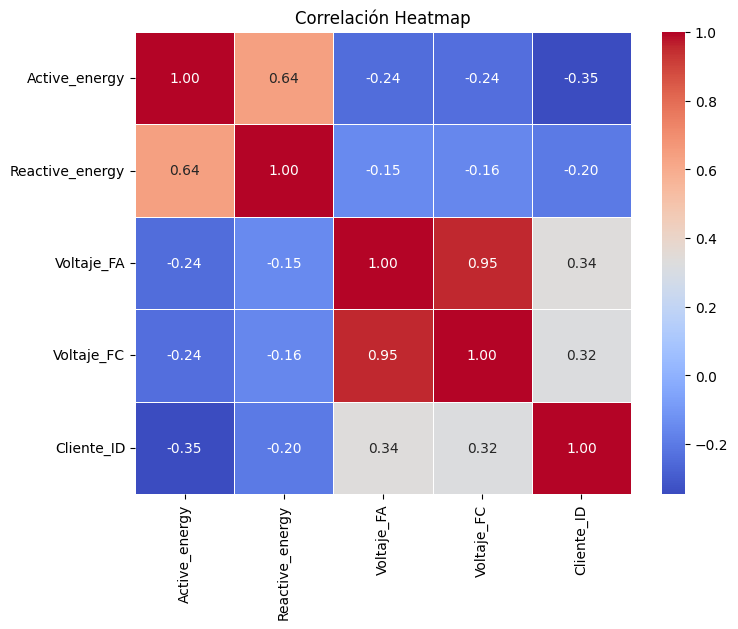

In [8]:
correlation_matrix =  df_resultado.select_dtypes(include='number').corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear el heatmap utilizando seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añadir título
plt.title('Correlación Heatmap')

# Mostrar el gráfico
plt.show()

### Transformación variables

#### Codificación de variable Sector_Económico

In [9]:
# Agrupar por 'Sector_Economico'
registros_por_sector = df_resultado.groupby('Sector_Economico')['Cliente_ID'].nunique().reset_index()

registros_por_sector = registros_por_sector.rename(columns={'Cliente_ID': 'Conteo_Clientes_Unicos'})

display(registros_por_sector)


Sector_Economico  Conteo_Clientes_Unicos
0      Captación, tratamiento y distribución de agua                       5
1                              Cultivo de Hortalizas                       5
2  Cultivo de hortalizas y melones, raíces y tubé...                       1
3  Cultivo de otros frutos y nueces de árboles y ...                       4
4               Cultivo de Árboles Frutales y Nueces                       5
5  Elaboración de cacao y chocolate y de producto...                       5
6  Venta al por mayor de metales y minerales meta...                       5

In [10]:
label_encoder = LabelEncoder()

# Aplicar la transformación a la columna 'Sector_Economico'
df_resultado['Sector_Economico_Num'] = label_encoder.fit_transform(df_resultado['Sector_Economico'])

# Mostrar las primeras filas del DataFrame con la nueva variable numérica
df_resultado


Fecha  Active_energy  Reactive_energy   Voltaje_FA  \
0       2021-01-01 00:00:00       0.291881         0.032022  2177.903904   
1       2021-01-01 01:00:00       0.165636         0.051760  2175.433588   
2       2021-01-01 02:00:00       0.231526         0.145776  2228.930556   
3       2021-01-01 03:00:00       0.595396         0.293655  2043.277873   
4       2021-01-01 04:00:00       0.802499         0.753280  2207.480123   
...                     ...            ...              ...          ...   
463420  2022-08-07 03:00:00       0.488331         0.042823  1846.060307   
463421  2022-08-07 04:00:00       0.373242         0.098315  1781.190283   
463422  2022-08-07 05:00:00       0.639498         0.119670  1812.042317   
463423  2022-08-07 06:00:00       0.473911         0.075118  1763.697303   
463424  2022-08-07 07:00:00       0.301186         0.039588  1833.376982   

         Voltaje_FC  Cliente_ID  \
0       2315.778626          18   
1       2050.903296          18   
2       2169.129233          18   
3       2051.131871          18   
4       2254.699271          18   
...             ...         ...   
463420  1833.775917          14   
463421  1792.889205          14   
463422  1789.768882          14   
463423  1830.269162          14   
463424  1757.808679          14   

                                         Sector_Economico  \
0           Captación, tratamiento y distribución de agua   
1           Captación, tratamiento y distribución de agua   
2           Captación, tratamiento y distribución de agua   
3           Captación, tratamiento y distribución de agua   
4           Captación, tratamiento y distribución de agua   
...                                                   ...   
463420  Cultivo de otros frutos y nueces de árboles y ...   
463421  Cultivo de otros frutos y nueces de árboles y ...   
463422  Cultivo de otros frutos y nueces de árboles y ...   
463423  Cultivo de otros frutos y nueces de árboles y ...   
463424  Cultivo de otros frutos y nueces de árboles y ...   

        Sector_Economico_Num  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
...                      ...  
463420                     3  
463421                     3  
463422                     3  
463423                     3  
463424                     3  

[463425 rows x 8 columns]

In [11]:
df_sectores_unicos = df_resultado[['Sector_Economico', 'Sector_Economico_Num']].drop_duplicates()
df_sectores_unicos

Sector_Economico  \
0           Captación, tratamiento y distribución de agua   
19500   Cultivo de otros frutos y nueces de árboles y ...   
33500   Elaboración de cacao y chocolate y de producto...   
92181                Cultivo de Árboles Frutales y Nueces   
111862  Venta al por mayor de metales y minerales meta...   
123277                              Cultivo de Hortalizas   
234510  Cultivo de hortalizas y melones, raíces y tubé...   

        Sector_Economico_Num  
0                          0  
19500                      3  
33500                      5  
92181                      4  
111862                     6  
123277                     1  
234510                     2

### Adición de nueva información

#### Energía Aparente

In [12]:
# Crear la nueva variable Apparent_energy
df_resultado['Apparent_energy'] = (df_resultado['Active_energy']**2 + df_resultado['Reactive_energy']**2)**0.5

df_resultado.head()

Fecha  Active_energy  Reactive_energy   Voltaje_FA  \
0  2021-01-01 00:00:00       0.291881         0.032022  2177.903904   
1  2021-01-01 01:00:00       0.165636         0.051760  2175.433588   
2  2021-01-01 02:00:00       0.231526         0.145776  2228.930556   
3  2021-01-01 03:00:00       0.595396         0.293655  2043.277873   
4  2021-01-01 04:00:00       0.802499         0.753280  2207.480123   

    Voltaje_FC  Cliente_ID                               Sector_Economico  \
0  2315.778626          18  Captación, tratamiento y distribución de agua   
1  2050.903296          18  Captación, tratamiento y distribución de agua   
2  2169.129233          18  Captación, tratamiento y distribución de agua   
3  2051.131871          18  Captación, tratamiento y distribución de agua   
4  2254.699271          18  Captación, tratamiento y distribución de agua   

   Sector_Economico_Num  Apparent_energy  
0                     0         0.293632  
1                     0         0.173535  
2                     0         0.273596  
3                     0         0.663875  
4                     0         1.100653

#### Hora

In [13]:
# Convertir la columna 'Fecha' a tipo datetime si aún no lo está
df_resultado['Fecha'] = pd.to_datetime(df_resultado['Fecha'])

# Crear una nueva columna 'Hora' que contiene la hora de la fecha
df_resultado['Hora'] = df_resultado['Fecha'].dt.hour

# Mostrar las primeras filas del DataFrame con la nueva columna 'Hora'
df_resultado

Fecha  Active_energy  Reactive_energy   Voltaje_FA  \
0      2021-01-01 00:00:00       0.291881         0.032022  2177.903904   
1      2021-01-01 01:00:00       0.165636         0.051760  2175.433588   
2      2021-01-01 02:00:00       0.231526         0.145776  2228.930556   
3      2021-01-01 03:00:00       0.595396         0.293655  2043.277873   
4      2021-01-01 04:00:00       0.802499         0.753280  2207.480123   
...                    ...            ...              ...          ...   
463420 2022-08-07 03:00:00       0.488331         0.042823  1846.060307   
463421 2022-08-07 04:00:00       0.373242         0.098315  1781.190283   
463422 2022-08-07 05:00:00       0.639498         0.119670  1812.042317   
463423 2022-08-07 06:00:00       0.473911         0.075118  1763.697303   
463424 2022-08-07 07:00:00       0.301186         0.039588  1833.376982   

         Voltaje_FC  Cliente_ID  \
0       2315.778626          18   
1       2050.903296          18   
2       2169.129233          18   
3       2051.131871          18   
4       2254.699271          18   
...             ...         ...   
463420  1833.775917          14   
463421  1792.889205          14   
463422  1789.768882          14   
463423  1830.269162          14   
463424  1757.808679          14   

                                         Sector_Economico  \
0           Captación, tratamiento y distribución de agua   
1           Captación, tratamiento y distribución de agua   
2           Captación, tratamiento y distribución de agua   
3           Captación, tratamiento y distribución de agua   
4           Captación, tratamiento y distribución de agua   
...                                                   ...   
463420  Cultivo de otros frutos y nueces de árboles y ...   
463421  Cultivo de otros frutos y nueces de árboles y ...   
463422  Cultivo de otros frutos y nueces de árboles y ...   
463423  Cultivo de otros frutos y nueces de árboles y ...   
463424  Cultivo de otros frutos y nueces de árboles y ...   

        Sector_Economico_Num  Apparent_energy  Hora  
0                          0         0.293632     0  
1                          0         0.173535     1  
2                          0         0.273596     2  
3                          0         0.663875     3  
4                          0         1.100653     4  
...                      ...              ...   ...  
463420                     3         0.490206     3  
463421                     3         0.385973     4  
463422                     3         0.650598     5  
463423                     3         0.479827     6  
463424                     3         0.303777     7  

[463425 rows x 10 columns]

#### Día de la semana

In [14]:
# Convertir la columna 'Fecha' a tipo datetime
df_resultado['Fecha'] = pd.to_datetime(df_resultado['Fecha'])
#Crea una fecha en formato AAAMM
df_resultado['Fecha_2'] = df_resultado['Fecha'].apply(lambda x: x.strftime("%Y%m"))
# Crear una nueva columna 'Dia_Semana_Num' que contiene el día de la semana como número
df_resultado['Dia_Semana_Num'] = df_resultado['Fecha'].dt.dayofweek
# Mostrar las primeras filas del DataFrame con la nueva columna 'Dia_Semana_Num'
df_resultado.head()

Fecha  Active_energy  Reactive_energy   Voltaje_FA  \
0 2021-01-01 00:00:00       0.291881         0.032022  2177.903904   
1 2021-01-01 01:00:00       0.165636         0.051760  2175.433588   
2 2021-01-01 02:00:00       0.231526         0.145776  2228.930556   
3 2021-01-01 03:00:00       0.595396         0.293655  2043.277873   
4 2021-01-01 04:00:00       0.802499         0.753280  2207.480123   

    Voltaje_FC  Cliente_ID                               Sector_Economico  \
0  2315.778626          18  Captación, tratamiento y distribución de agua   
1  2050.903296          18  Captación, tratamiento y distribución de agua   
2  2169.129233          18  Captación, tratamiento y distribución de agua   
3  2051.131871          18  Captación, tratamiento y distribución de agua   
4  2254.699271          18  Captación, tratamiento y distribución de agua   

   Sector_Economico_Num  Apparent_energy  Hora Fecha_2  Dia_Semana_Num  
0                     0         0.293632     0  202101               4  
1                     0         0.173535     1  202101               4  
2                     0         0.273596     2  202101               4  
3                     0         0.663875     3  202101               4  
4                     0         1.100653     4  202101               4

**Preprocesamiento y transformación de datos para modelamiento**

In [15]:
df_tratamiento=df_resultado[['Cliente_ID','Apparent_energy','Fecha_2'] ]
df_tratamiento=df_tratamiento.groupby(['Cliente_ID', 'Fecha_2'])['Apparent_energy'].sum().reset_index()
df_pivot = df_tratamiento.pivot_table(index='Cliente_ID', columns='Fecha_2', values='Apparent_energy').reset_index()
df_pivot=df_pivot.set_index('Cliente_ID')
#df_pivot['cols_null'] = df_pivot.isnull().sum(axis=1)
df_pivot.head()

Fecha_2          202101       202102       202103       202104       202105  \
Cliente_ID                                                                    
1           1277.377248  1527.367746  1990.268513  2584.478694  2535.100615   
2           2145.355784  1931.548377  2154.640623  2041.867380  2162.946200   
3           1692.406908  1517.097895  1686.539969  1592.340473  1693.298944   
4            598.761012   539.963259   593.996147   568.041878   599.159418   
5           4397.439266  3949.501081  4358.751678  3521.939933  3421.580587   

Fecha_2          202106       202107       202108       202109       202110  \
Cliente_ID                                                                    
1           1034.067108  1043.244448  1081.096309  4193.418661  4478.571412   
2           2072.411576  2115.948853  2155.932445  2048.763422  2140.640256   
3           1620.373114  1660.446195  1696.041193  1612.095598  1671.190458   
4            569.295029   579.801820   610.615418   558.580862   598.701069   
5           3280.520809  4282.697818  6069.302796  6201.520244  6309.558393   

Fecha_2     ...       202207       202208       202209       202210  \
Cliente_ID  ...                                                       
1           ...  1079.920226  1038.553778  1074.344250  1046.763410   
2           ...  2162.018678  2114.811241  2116.591862  2114.101010   
3           ...  1688.785038  1655.785529  1652.167885  1666.199977   
4           ...   597.372628   580.676638   594.836391   592.825706   
5           ...  4374.153579  4341.243607  4196.208782  4334.123832   

Fecha_2          202211       202212       202301       202302       202303  \
Cliente_ID                                                                    
1           1035.825793  1038.023874  1071.940356   952.903473  1071.227539   
2           2078.574678  2109.928911  1923.747750  1469.846840  2152.827936   
3           1632.865572  1666.613583  1484.322705  1099.001964  1689.709747   
4            580.373939   581.810391   489.500991   324.055778   596.449949   
5           4260.579813  4285.636773  4333.399865  3962.996359  4374.804960   

Fecha_2       202304  
Cliente_ID            
1           0.852596  
2           2.355162  
3           2.148546  
4           0.289003  
5           5.895011  

[5 rows x 28 columns]

In [16]:
df_pivot.isnull().sum()

Fecha_2
202101     0
202102     0
202103     0
202104     0
202105     0
202106     0
202107     0
202108     0
202109     0
202110     0
202111     0
202112     0
202201     0
202202     5
202203     5
202204     5
202205    11
202206    11
202207    11
202208    11
202209    15
202210    15
202211    15
202212    15
202301    15
202302    15
202303    15
202304    20
dtype: int64

In [17]:
#valida missing values del último periodo y elimina si la variación porcentual promedio es mayor a 150
while True:
    drop_per = df_pivot[df_pivot.iloc[:, -1].notnull()]
    drop_per['variacion_porcentual'] = ((drop_per.iloc[:, -2] - drop_per.iloc[:, -1]) / drop_per.iloc[:, -1]) * 100
    variacion_prom = drop_per['variacion_porcentual'].mean()
    #print(drop_per.iloc[:, -3:])
    print("Variacion mes " + df_pivot.columns[-1] +": " +str(variacion_prom))

    if abs(variacion_prom) < 150:
        break

    df_pivot = df_pivot.drop(columns=[df_pivot.columns[-1]])

    if len(df_pivot.columns) == 1:
        break

Variacion mes 202304: 90268.03798430157
Variacion mes 202303: -5.756140668838705


In [19]:
df = df_pivot.copy()

for index, row in df_pivot.iterrows():
    non_null_values = row.dropna().values  # Valores no nulos de la fila
    null_indexes = row.isnull()  # índices de los valores nulos

    # Reemplaza los valores nulos con los valores no nulos consecutivos
    for i, is_null in enumerate(null_indexes):
        if is_null:
            df.at[index, df_pivot.columns[i]] = non_null_values[i % len(non_null_values)]

# Inserta la columna 'Cliente_ID'
df['Cliente_ID'] = df_pivot.index

# Reemplaza nulos con los valores actualizados en el DataFrame original
df.update(df)

master_table=df.set_index('Cliente_ID')
master_table.head()

Fecha_2          202101       202102       202103       202104       202105  \
Cliente_ID                                                                    
1           1277.377248  1527.367746  1990.268513  2584.478694  2535.100615   
2           2145.355784  1931.548377  2154.640623  2041.867380  2162.946200   
3           1692.406908  1517.097895  1686.539969  1592.340473  1693.298944   
4            598.761012   539.963259   593.996147   568.041878   599.159418   
5           4397.439266  3949.501081  4358.751678  3521.939933  3421.580587   

Fecha_2          202106       202107       202108       202109       202110  \
Cliente_ID                                                                    
1           1034.067108  1043.244448  1081.096309  4193.418661  4478.571412   
2           2072.411576  2115.948853  2155.932445  2048.763422  2140.640256   
3           1620.373114  1660.446195  1696.041193  1612.095598  1671.190458   
4            569.295029   579.801820   610.615418   558.580862   598.701069   
5           3280.520809  4282.697818  6069.302796  6201.520244  6309.558393   

Fecha_2     ...       202206       202207       202208       202209  \
Cliente_ID  ...                                                       
1           ...  1035.092614  1079.920226  1038.553778  1074.344250   
2           ...  2063.093904  2162.018678  2114.811241  2116.591862   
3           ...  1631.947321  1688.785038  1655.785529  1652.167885   
4           ...   577.654190   597.372628   580.676638   594.836391   
5           ...  4222.342788  4374.153579  4341.243607  4196.208782   

Fecha_2          202210       202211       202212       202301       202302  \
Cliente_ID                                                                    
1           1046.763410  1035.825793  1038.023874  1071.940356   952.903473   
2           2114.101010  2078.574678  2109.928911  1923.747750  1469.846840   
3           1666.199977  1632.865572  1666.613583  1484.322705  1099.001964   
4            592.825706   580.373939   581.810391   489.500991   324.055778   
5           4334.123832  4260.579813  4285.636773  4333.399865  3962.996359   

Fecha_2          202303  
Cliente_ID               
1           1071.227539  
2           2152.827936  
3           1689.709747  
4            596.449949  
5           4374.804960  

[5 rows x 27 columns]

# Separación Train y test

> 2 meses para testear el modelo



In [20]:
#Conversión de formato fecha completa
dates = pd.date_range(start="2021-01-01", periods=len(master_table.columns), freq="M")
master_table.columns = dates
#División Train y test y conversión de formato fecha completa
df_train=master_table.iloc[:, :-1]
df_test=master_table.iloc[:, -1:]
df_train.head()

2021-01-31   2021-02-28   2021-03-31   2021-04-30   2021-05-31  \
Cliente_ID                                                                    
1           1277.377248  1527.367746  1990.268513  2584.478694  2535.100615   
2           2145.355784  1931.548377  2154.640623  2041.867380  2162.946200   
3           1692.406908  1517.097895  1686.539969  1592.340473  1693.298944   
4            598.761012   539.963259   593.996147   568.041878   599.159418   
5           4397.439266  3949.501081  4358.751678  3521.939933  3421.580587   

             2021-06-30   2021-07-31   2021-08-31   2021-09-30   2021-10-31  \
Cliente_ID                                                                    
1           1034.067108  1043.244448  1081.096309  4193.418661  4478.571412   
2           2072.411576  2115.948853  2155.932445  2048.763422  2140.640256   
3           1620.373114  1660.446195  1696.041193  1612.095598  1671.190458   
4            569.295029   579.801820   610.615418   558.580862   598.701069   
5           3280.520809  4282.697818  6069.302796  6201.520244  6309.558393   

            ...   2022-05-31   2022-06-30   2022-07-31   2022-08-31  \
Cliente_ID  ...                                                       
1           ...  1039.624127  1035.092614  1079.920226  1038.553778   
2           ...  2099.821801  2063.093904  2162.018678  2114.811241   
3           ...  1653.903009  1631.947321  1688.785038  1655.785529   
4           ...   581.299284   577.654190   597.372628   580.676638   
5           ...  4366.850127  4222.342788  4374.153579  4341.243607   

             2022-09-30   2022-10-31   2022-11-30   2022-12-31   2023-01-31  \
Cliente_ID                                                                    
1           1074.344250  1046.763410  1035.825793  1038.023874  1071.940356   
2           2116.591862  2114.101010  2078.574678  2109.928911  1923.747750   
3           1652.167885  1666.199977  1632.865572  1666.613583  1484.322705   
4            594.836391   592.825706   580.373939   581.810391   489.500991   
5           4196.208782  4334.123832  4260.579813  4285.636773  4333.399865   

             2023-02-28  
Cliente_ID               
1            952.903473  
2           1469.846840  
3           1099.001964  
4            324.055778  
5           3962.996359  

[5 rows x 26 columns]

In [21]:
#Dimensión Train y test
print( " dim train")
print(df_train.shape)
print(" dim test")
print(df_test.shape)

 dim train
(30, 26)
 dim test
(30, 1)


## Entrenamiento y validación de modelos

In [22]:
#Holt Winters
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
predictions = {}
train_rmse = {}

for cliente_id, row in df_train.iterrows():
    model = ExponentialSmoothing(row, seasonal_periods=12, trend='add', seasonal='add',initialization_method="estimated").fit(optimized=True,smoothing_level=0.95, smoothing_trend=0.9,
                                     damping_trend=0.98)
    pred = model.forecast(1)
    predictions[cliente_id] = pred
    train_rmse[cliente_id] = rmse(row, model.fittedvalues)

# Construir DataFrame de predicciones
pred_df = pd.DataFrame(predictions).T
pred_df['Train_RMSE'] = pd.Series(train_rmse)
#pred_df.columns = ['pred_'+str(df_train.columns[-2]), 'pred_'+str(df_train.columns[-1]), 'Train_RMSE']
pred_df.columns = ['pred_1', 'Train_RMSE']
pred_df.index.name = 'Cliente_ID'
print(pred_df.head())
merged_df = df_train.merge(df_test, on='Cliente_ID', how='left')
merged_df=merged_df.merge(pred_df, on='Cliente_ID', how='left')
print("RMSE test:"+str(np.sqrt(mean_squared_error(merged_df.iloc[:, -3], merged_df["pred_1"])))+"-RMSE test prom cliente :"+str(np.sqrt(mean_squared_error(merged_df.iloc[:, -3], merged_df["pred_1"]))/30))

                 pred_1  Train_RMSE
Cliente_ID                         
1           1147.160886  854.581315
2           1069.519083  431.833068
3            636.150517  446.619726
4           -115.050323  491.532128
5           4114.429310  380.603100
RMSE test:636.044842028027-RMSE test prom cliente :21.201494734267566


In [23]:
merged_df['variacion_porcentual'] = ((merged_df.iloc[:, -2] - merged_df.iloc[:, -3]) /merged_df.iloc[:, -3]) * 100
merged_df.head()

2021-01-31 00:00:00  2021-02-28 00:00:00  2021-03-31 00:00:00  \
Cliente_ID                                                                  
1                   1277.377248          1527.367746          1990.268513   
2                   2145.355784          1931.548377          2154.640623   
3                   1692.406908          1517.097895          1686.539969   
4                    598.761012           539.963259           593.996147   
5                   4397.439266          3949.501081          4358.751678   

            2021-04-30 00:00:00  2021-05-31 00:00:00  2021-06-30 00:00:00  \
Cliente_ID                                                                  
1                   2584.478694          2535.100615          1034.067108   
2                   2041.867380          2162.946200          2072.411576   
3                   1592.340473          1693.298944          1620.373114   
4                    568.041878           599.159418           569.295029   
5                   3521.939933          3421.580587          3280.520809   

            2021-07-31 00:00:00  2021-08-31 00:00:00  2021-09-30 00:00:00  \
Cliente_ID                                                                  
1                   1043.244448          1081.096309          4193.418661   
2                   2115.948853          2155.932445          2048.763422   
3                   1660.446195          1696.041193          1612.095598   
4                    579.801820           610.615418           558.580862   
5                   4282.697818          6069.302796          6201.520244   

            2021-10-31 00:00:00  ...  2022-09-30 00:00:00  \
Cliente_ID                       ...                        
1                   4478.571412  ...          1074.344250   
2                   2140.640256  ...          2116.591862   
3                   1671.190458  ...          1652.167885   
4                    598.701069  ...           594.836391   
5                   6309.558393  ...          4196.208782   

            2022-10-31 00:00:00  2022-11-30 00:00:00  2022-12-31 00:00:00  \
Cliente_ID                                                                  
1                   1046.763410          1035.825793          1038.023874   
2                   2114.101010          2078.574678          2109.928911   
3                   1666.199977          1632.865572          1666.613583   
4                    592.825706           580.373939           581.810391   
5                   4334.123832          4260.579813          4285.636773   

            2023-01-31 00:00:00  2023-02-28 00:00:00  2023-03-31 00:00:00  \
Cliente_ID                                                                  
1                   1071.940356           952.903473          1071.227539   
2                   1923.747750          1469.846840          2152.827936   
3                   1484.322705          1099.001964          1689.709747   
4                    489.500991           324.055778           596.449949   
5                   4333.399865          3962.996359          4374.804960   

                 pred_1  Train_RMSE  variacion_porcentual  
Cliente_ID                                                 
1           1147.160886  854.581315              7.088442  
2           1069.519083  431.833068            -50.320271  
3            636.150517  446.619726            -62.351492  
4           -115.050323  491.532128           -119.289183  
5           4114.429310  380.603100             -5.951709  

[5 rows x 30 columns]

In [24]:
#Calibración Holt winters

import numpy as np
import pandas as pd
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Crear una lista de valores para los hiperparámetros de suavizado
smoothing_level_values = np.arange(0.1, 1.0, 0.05)
smoothing_trend_values = np.arange(0.1, 1.0, 0.05)

best_rmse = np.inf
best_params = {}

for smoothing_level in smoothing_level_values:
    for smoothing_trend in smoothing_trend_values:
        predictions = {}
        train_rmse = {}

        for cliente_id, row in df_train.iterrows():
            model = ExponentialSmoothing(row, seasonal_periods=12, trend='add', seasonal='add', initialization_method="estimated").fit(optimized=True, smoothing_level=smoothing_level, smoothing_trend=smoothing_trend, damping_trend=0.98)
            pred = model.forecast(1)
            predictions[cliente_id] = pred
            train_rmse[cliente_id] = rmse(row, model.fittedvalues)

        # Construir DataFrame de predicciones
        pred_df = pd.DataFrame(predictions).T
        pred_df['Train_RMSE'] = pd.Series(train_rmse)
        pred_df.columns = ['pred_'+str(df_train.columns[-1]), 'Train_RMSE']
        pred_df.index.name = 'Cliente_ID'
        merged_df = df_train.merge(df_test, on='Cliente_ID', how='left')
        merged_df = merged_df.merge(pred_df, on='Cliente_ID', how='left')

        # Calcular RMSE promedio para esta combinación de hiperparámetros
        avg_rmse = np.sqrt(mean_squared_error(merged_df.iloc[:, -3], merged_df.iloc[:, -2]))

        # Actualizar los mejores hiperparámetros si se encuentra un nuevo mínimo de RMSE
        if avg_rmse < best_rmse:
            best_rmse = avg_rmse
            best_params = {'smoothing_level': smoothing_level, 'smoothing_trend': smoothing_trend}

print("Mejores hiperparámetros encontrados:")
print(best_params)
print("RMSE mínimo encontrado:", best_rmse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Mejores hiperparámetros encontrados:
{'smoothing_level': 0.6500000000000001, 'smoothing_trend': 0.1}
RMSE mínimo encontrado: 355.9853026115358


In [25]:
#Mejor modelo HW
# Evaluación mejores hiperparametros
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
predictions = {}
train_rmse = {}

for cliente_id, row in df_train.iterrows():
    model = ExponentialSmoothing(row, seasonal_periods=12, trend='add', seasonal='add',initialization_method="estimated").fit(optimized=True,smoothing_level=0.65, smoothing_trend=0.0001,
                                     damping_trend=0.98)
    pred = model.forecast(1)
    predictions[cliente_id] = pred
    train_rmse[cliente_id] = rmse(row, model.fittedvalues)

# Construir DataFrame de predicciones
pred_df = pd.DataFrame(predictions).T
pred_df['Train_RMSE'] = pd.Series(train_rmse)
#pred_df.columns = ['pred_'+str(df_train.columns[-2]), 'pred_'+str(df_train.columns[-1]), 'Train_RMSE']
pred_df.columns = ['pred_1', 'Train_RMSE']
pred_df.index.name = 'Cliente_ID'
print(pred_df.head())
merged_df = df_train.merge(df_test, on='Cliente_ID', how='left')
merged_df=merged_df.merge(pred_df, on='Cliente_ID', how='left')
print("RMSE test:"+str(np.sqrt(mean_squared_error(merged_df.iloc[:, -3], merged_df["pred_1"])))+"-RMSE test prom cliente :"+str(np.sqrt(mean_squared_error(merged_df.iloc[:, -3], merged_df["pred_1"]))/30))
print("MAPE test:"+str(np.mean(np.abs((merged_df.iloc[:, -3] - merged_df["pred_1"]) / merged_df.iloc[:, -3])) * 100))
rmse_hw=np.sqrt(mean_squared_error(merged_df.iloc[:, -3], merged_df["pred_1"]))
mape_hw=np.mean(np.abs((merged_df.iloc[:, -3] - merged_df["pred_1"]) / merged_df.iloc[:, -3])) * 100

                 pred_1  Train_RMSE
Cliente_ID                         
1           1073.536332  804.102076
2           1733.364078  553.438617
3           1234.522022  574.368305
4            561.245175  614.802152
5           3917.335996  433.044446
RMSE test:335.48299525936875-RMSE test prom cliente :11.182766508645624
MAPE test:34.1578507954102


In [26]:
#Arima
from statsmodels.tsa.arima.model import ARIMA

predictions = {}
train_rmse = {}

for cliente_id, row in df_train.iterrows():
    model = ARIMA(row, order=(5,1,0)).fit()
    pred = model.forecast(steps=1)[0]
    predictions[cliente_id] = pred
    train_rmse[cliente_id] = rmse(row, model.fittedvalues)

# Construir DataFrame de predicciones
pred_df = pd.DataFrame(predictions.values(), index=predictions.keys(), columns=['pred_1'])
pred_df['Train_RMSE'] = pd.Series(train_rmse)
pred_df.index.name = 'Cliente_ID'
print(pred_df.head())

merged_df = df_train.merge(df_test, on='Cliente_ID', how='left').merge(pred_df, on='Cliente_ID', how='left')
print("RMSE test:"+str(np.sqrt(mean_squared_error(merged_df.iloc[:, -3], merged_df["pred_1"])))+"-RMSE test prom cliente :"+str(np.sqrt(mean_squared_error(merged_df.iloc[:, -3], merged_df["pred_1"]))/30))

                 pred_1   Train_RMSE
Cliente_ID                          
1            942.157191   745.841523
2           1325.676652   652.308825
3            960.623544   603.583567
4            263.200342   539.678800
5           3958.132144  1018.061546
RMSE test:398.6456206134012-RMSE test prom cliente :13.28818735378004


In [27]:
#Calibración Arima
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Define los hiperparámetros a probar
p_values = [0, 1, 2, 3, 4, 5]
d_values = [0, 1]

best_rmse = np.inf
best_model = None
best_params = None

for p in p_values:
    for d in d_values:
        predictions = {}
        train_rmse = {}

        for cliente_id, row in df_train.iterrows():
            try:
                model = ARIMA(row, order=(p, d, 0)).fit()
                pred = model.forecast(steps=1)[0]
                predictions[cliente_id] = pred
                train_rmse[cliente_id] = rmse(row, model.fittedvalues)
            except:
                continue

        # Construir DataFrame de predicciones
        pred_df = pd.DataFrame(predictions.values(), index=predictions.keys(), columns=['pred_1'])
        pred_df['Train_RMSE'] = pd.Series(train_rmse)
        pred_df.index.name = 'Cliente_ID'

        merged_df = df_train.merge(df_test, on='Cliente_ID', how='left').merge(pred_df, on='Cliente_ID', how='left')

        # Calcular RMSE solo si no contiene missing values la predicción
        if merged_df["pred_1"].notna().all():
            rmse_test = np.sqrt(mean_squared_error(merged_df.iloc[:, -3], merged_df["pred_1"]))

            # Actualizar el mejor modelo
            if rmse_test < best_rmse:
                best_rmse = rmse_test
                best_model = pred_df
                best_params = (p, d, 0)

print("Mejores hiperparámetros:", best_params)
print("RMSE test del mejor modelo:", best_rmse)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mejores hiperparámetros: (0, 1, 0)
RMSE test del mejor modelo: 237.84192650512634


## Ajuste y comparación mejor modelo elegido

In [171]:
# Evaluación mejores hiperparametros
from statsmodels.tsa.arima.model import ARIMA

predictions = {}
train_rmse = {}

for cliente_id, row in df_train.iterrows():
    model = ARIMA(row, order=(0,1,0)).fit()
    pred = model.forecast(steps=1)[0]
    predictions[cliente_id] = pred
    train_rmse[cliente_id] = rmse(row, model.fittedvalues)

# Construir DataFrame de predicciones
pred_df = pd.DataFrame(predictions.values(), index=predictions.keys(), columns=['pred_1'])
pred_df['Train_RMSE'] = pd.Series(train_rmse)
pred_df.index.name = 'Cliente_ID'
print(pred_df.head())

merged_df = df_train.merge(df_test, on='Cliente_ID', how='left').merge(pred_df, on='Cliente_ID', how='left')
print("RMSE test:"+str(np.sqrt(mean_squared_error(merged_df.iloc[:, -3], merged_df["pred_1"])))+"-RMSE test prom cliente :"+str(np.sqrt(mean_squared_error(merged_df.iloc[:, -3], merged_df["pred_1"]))/30))
print("MAPE test:"+str(np.mean(np.abs((merged_df.iloc[:, -3] - merged_df["pred_1"]) / merged_df.iloc[:, -3])) * 100))
rmse_ar=np.sqrt(mean_squared_error(merged_df.iloc[:, -3], merged_df["pred_1"]))
mape_ar=np.mean(np.abs((merged_df.iloc[:, -3] - merged_df["pred_1"]) / merged_df.iloc[:, -3])) * 100
df_arima=merged_df
df_arima['variacion_porcentual'] = ((df_arima.iloc[:, -2] - df_arima.iloc[:, -3]) /df_arima.iloc[:, -3]) * 100

                 pred_1   Train_RMSE
Cliente_ID                          
1            952.903473   972.117773
2           1469.846840   725.920750
3           1099.001964   691.783085
4            324.055778   656.130220
5           3962.996359  1049.958042
RMSE test:237.84192650512634-RMSE test prom cliente :7.928064216837544
MAPE test:26.149038905920623


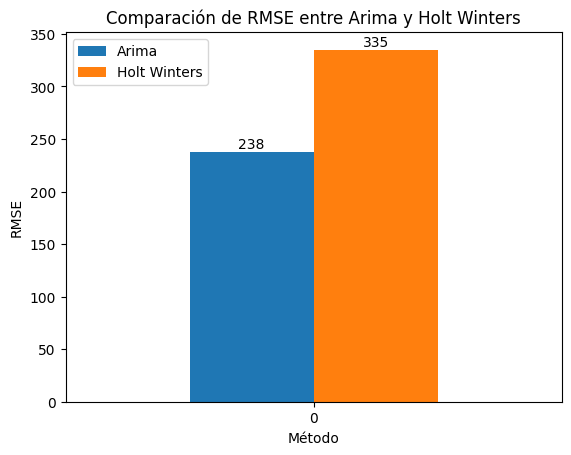

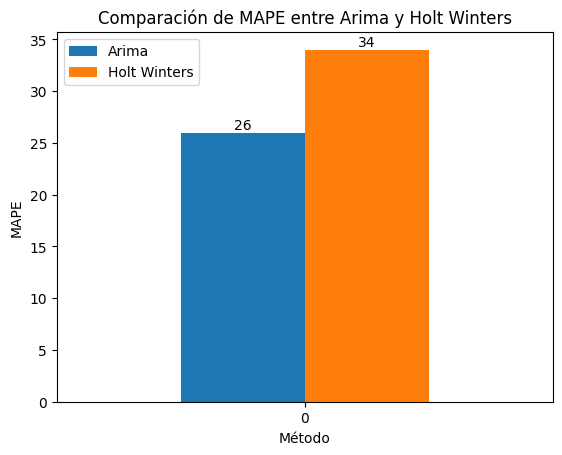

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

resultados = pd.DataFrame({
    'Arima': [round(rmse_ar)],
    'Holt Winters': [round(rmse_hw)]
})

# Crear el gráfico de barras
ax = resultados.plot(kind='bar')
plt.ylabel('RMSE')  # Etiqueta para el eje y
plt.xlabel('Método')  # Etiqueta para el eje x
plt.title('Comparación de RMSE entre Arima y Holt Winters')  # Título del gráfico
plt.xticks(rotation=0)  # Rotación de etiquetas del eje x

# Agregar etiquetas de datos en las barras
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(round(i.get_height(), 2)), ha='center', va='bottom')

plt.show()  # Mostrar el gráfico


resultados = pd.DataFrame({
    'Arima': [round(mape_ar)],
    'Holt Winters': [round(mape_hw)]
})

# Crear el gráfico de barras
ax = resultados.plot(kind='bar')
plt.ylabel('MAPE')  # Etiqueta para el eje y
plt.xlabel('Método')  # Etiqueta para el eje x
plt.title('Comparación de MAPE entre Arima y Holt Winters')  # Título del gráfico
plt.xticks(rotation=0)  # Rotación de etiquetas del eje x

# Agregar etiquetas de datos en las barras
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(round(i.get_height(), 2)), ha='center', va='bottom')

plt.show()  # Mostrar el gráfico


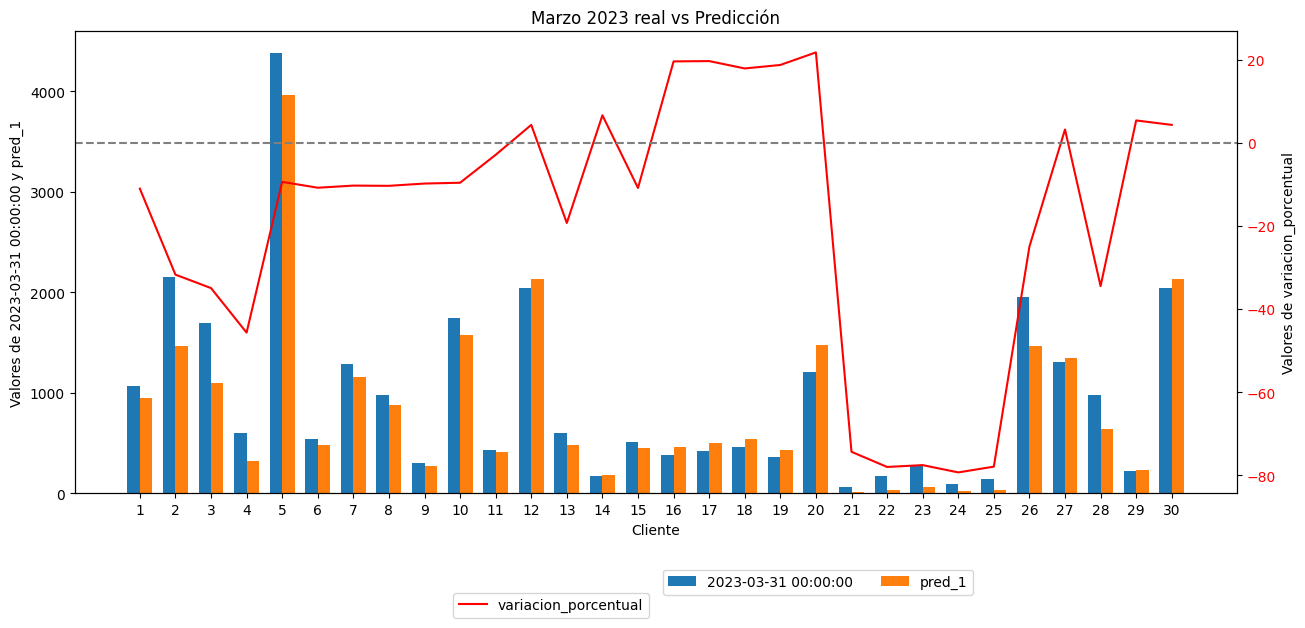

In [173]:
df_arima=df_arima.iloc[:,-4:]
# Obtener los nombres de las columnas
column_names = df_arima.columns

# Graficar
fig, ax1 = plt.subplots(figsize=(15, 6))  # Ancho de 10 y alto de 6

# Barras para la primera columna
bar_width = 0.35
index = df_arima.index
ax1.bar(index - bar_width/2, df_arima.iloc[:, 0], bar_width, label=column_names[0])

# Barras para la segunda columna
ax1.bar(index + bar_width/2, df_arima.iloc[:, 1], bar_width, label=column_names[1])

ax1.set_xlabel('Cliente')
ax1.set_ylabel(f'Valores de {column_names[0]} y {column_names[1]}')
ax1.set_title('Marzo 2023 real vs Predicción')
ax1.set_xticks(index)
ax1.legend(loc='upper left', bbox_to_anchor=(0.5, -0.15), ncol=2)  # Ajustar la leyenda

# Segundo eje para la línea
ax2 = ax1.twinx()
ax2.plot(df_arima.index, df_arima.iloc[:, -1], color='red', label=column_names[-1])

# Línea recta punteada en el valor de 0 en el eje de la línea
ax2.axhline(0, color='gray', linestyle='--')

ax2.set_ylabel(f'Valores de {column_names[-1]}')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right', bbox_to_anchor=(0.5, -0.2))  # Ajustar la leyenda

plt.show()

In [169]:
# Evaluación mejores hiperparametros
from statsmodels.tsa.arima.model import ARIMA

predictions = {}
train_rmse = {}

for cliente_id, row in df_train.iterrows():
    model = ARIMA(row, order=(4,1,0)).fit()
    pred = model.forecast(steps=1)[0]
    predictions[cliente_id] = pred
    train_rmse[cliente_id] = rmse(row, model.fittedvalues)

# Construir DataFrame de predicciones
pred_df = pd.DataFrame(predictions.values(), index=predictions.keys(), columns=['pred_1'])
pred_df['Train_RMSE'] = pd.Series(train_rmse)
pred_df.index.name = 'Cliente_ID'
print(pred_df.head())

merged_df = df_train.merge(df_test, on='Cliente_ID', how='left').merge(pred_df, on='Cliente_ID', how='left')
print("RMSE test:"+str(np.sqrt(mean_squared_error(merged_df.iloc[:, -3], merged_df["pred_1"])))+"-RMSE test prom cliente :"+str(np.sqrt(mean_squared_error(merged_df.iloc[:, -3], merged_df["pred_1"]))/30))
print("MAPE test:"+str(np.mean(np.abs((merged_df.iloc[:, -3] - merged_df["pred_1"]) / merged_df.iloc[:, -3])) * 100))
rmse_ar=np.sqrt(mean_squared_error(merged_df.iloc[:, -3], merged_df["pred_1"]))
mape_ar=np.mean(np.abs((merged_df.iloc[:, -3] - merged_df["pred_1"]) / merged_df.iloc[:, -3])) * 100
df_arima=merged_df
df_arima['variacion_porcentual'] = ((df_arima.iloc[:, -2] - df_arima.iloc[:, -3]) /df_arima.iloc[:, -3]) * 100

                 pred_1   Train_RMSE
Cliente_ID                          
1            942.256476   745.615750
2           1344.903110   656.668619
3            972.340579   607.538203
4            266.923672   541.889460
5           3926.368945  1027.647019
RMSE test:351.8743635003652-RMSE test prom cliente :11.729145450012172
MAPE test:28.41521617566865


## Ajuste modelo para generar predicción de tres meses

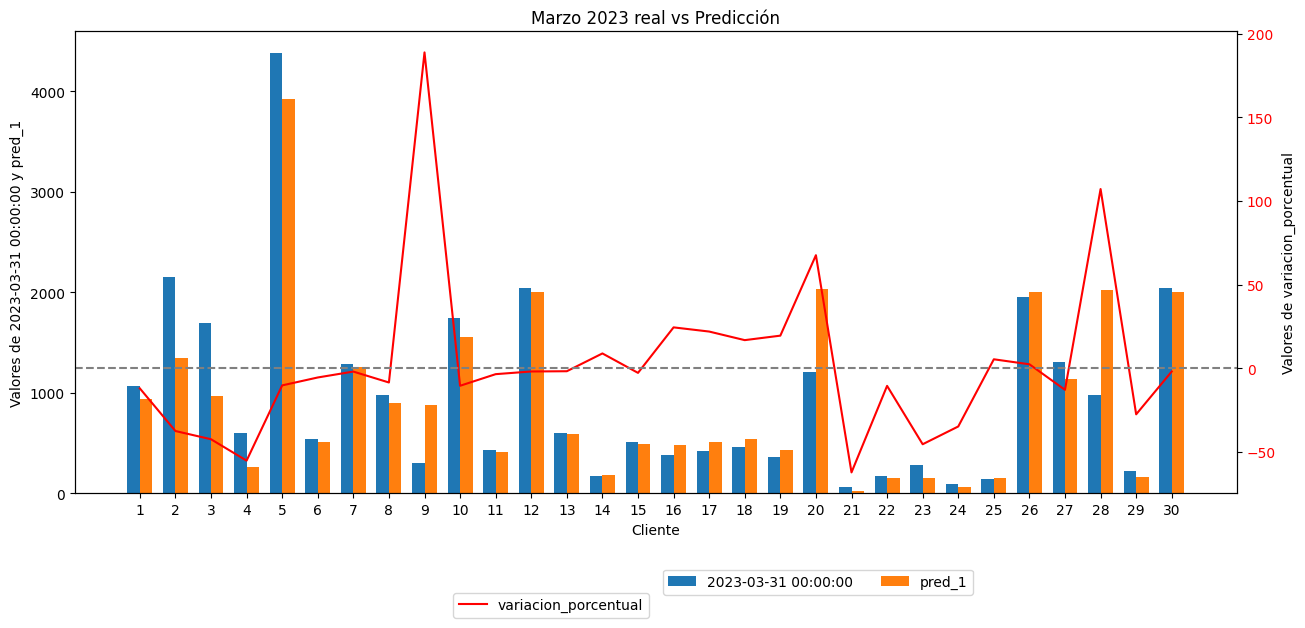

In [170]:
df_arima=df_arima.iloc[:,-4:]
# Obtener los nombres de las columnas
column_names = df_arima.columns

# Graficar
fig, ax1 = plt.subplots(figsize=(15, 6))  # Ancho de 10 y alto de 6

# Barras para la primera columna
bar_width = 0.35
index = df_arima.index
ax1.bar(index - bar_width/2, df_arima.iloc[:, 0], bar_width, label=column_names[0])

# Barras para la segunda columna
ax1.bar(index + bar_width/2, df_arima.iloc[:, 1], bar_width, label=column_names[1])

ax1.set_xlabel('Cliente')
ax1.set_ylabel(f'Valores de {column_names[0]} y {column_names[1]}')
ax1.set_title('Marzo 2023 real vs Predicción')
ax1.set_xticks(index)
ax1.legend(loc='upper left', bbox_to_anchor=(0.5, -0.15), ncol=2)  # Ajustar la leyenda

# Segundo eje para la línea
ax2 = ax1.twinx()
ax2.plot(df_arima.index, df_arima.iloc[:, -1], color='red', label=column_names[-1])

# Línea recta punteada en el valor de 0 en el eje de la línea
ax2.axhline(0, color='gray', linestyle='--')

ax2.set_ylabel(f'Valores de {column_names[-1]}')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right', bbox_to_anchor=(0.5, -0.2))  # Ajustar la leyenda

plt.show()

## Predicción Consumo tres meses posteriores

In [176]:
#predicción 3 periodos Holt WInters
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
predictions = {}
train_rmse = {}
df_3m=master_table.copy()
for cliente_id, row in df_3m.iterrows():
    model = ExponentialSmoothing(row, seasonal_periods=12, trend='add', seasonal='add',initialization_method="estimated").fit(optimized=True,smoothing_level=0.65, smoothing_trend=0.0001,
                                     damping_trend=0.98)
    pred = model.forecast(3)
    predictions[cliente_id] = pred

# Construir DataFrame de predicciones
pred_df = pd.DataFrame(predictions).T
#pred_df.columns = ['pred_1', 'pred_2','pred_3']
pred_df.index.name = 'Cliente_ID'
hw_3m=df_3m.merge(pred_df, on='Cliente_ID', how='left')

In [177]:
#ARIMA 3 peridos posteriores
df_3m = master_table.copy()
predictions = {}
train_rmse = {}

for cliente_id, row in df_3m.iterrows():
    model = ARIMA(row, order=(4, 1, 0)).fit()
    pred = model.forecast(steps=3)
    predictions[cliente_id] = pred


# Construir DataFrame de predicciones
pred_df = pd.DataFrame(predictions.values(), index=predictions.keys())
pred_df.index.name = 'Cliente_ID'

arima_3m = df_3m.merge(pred_df, on='Cliente_ID', how='left')

In [203]:
df_combined = pd.concat([arima_3m.iloc[:,-8:],hw_3m.iloc[:,-8:]], ignore_index=False).reset_index()
cliente_26 = df_combined[df_combined['Cliente_ID'] == 26]
cliente_26

Cliente_ID  2022-11-30 00:00:00  2022-12-31 00:00:00  2023-01-31 00:00:00  \
25          26           558.293251           493.939904                  0.0   
55          26           558.293251           493.939904                  0.0   

    2023-02-28 00:00:00  2023-03-31 00:00:00  2023-04-30 00:00:00  \
25          1467.567276          1956.463201          1452.607771   
55          1467.567276          1956.463201          2112.373860   

    2023-05-31 00:00:00  2023-06-30 00:00:00  
25          1186.705110           632.459176  
55          2151.572122          1738.909277

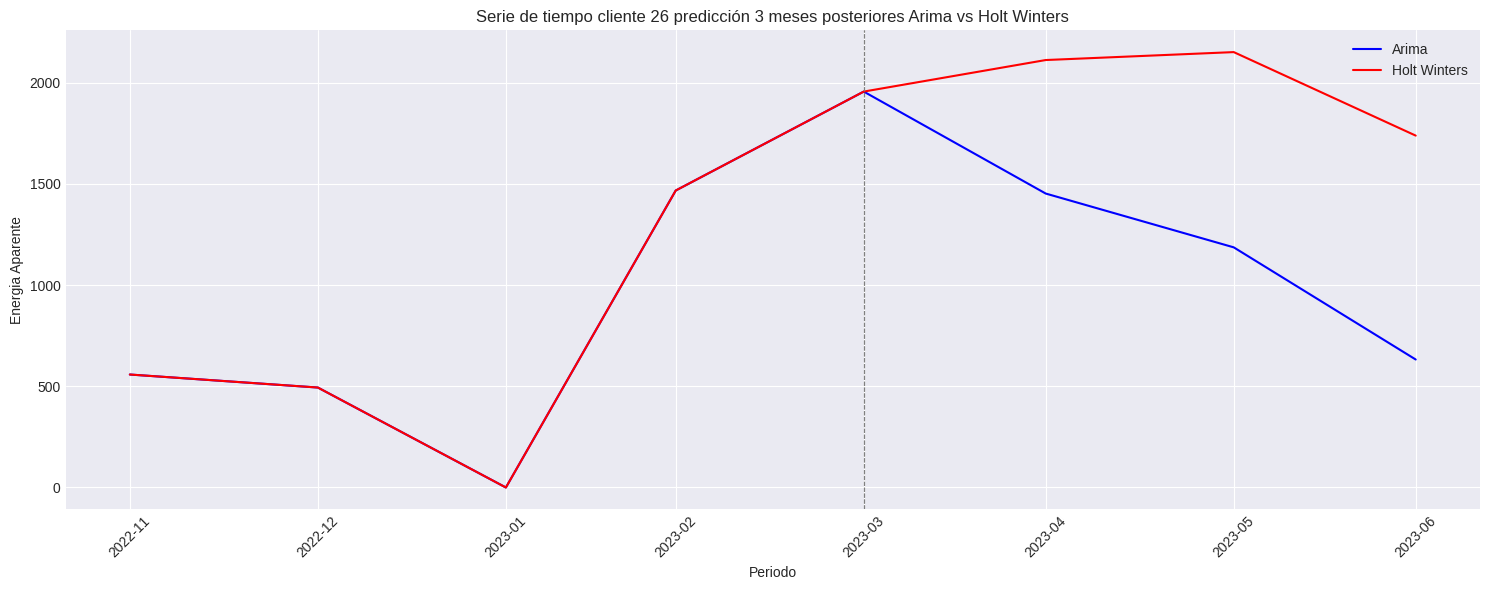

In [223]:


cliente_df = df_combined[df_combined['Cliente_ID'] == 26]
cliente_df = cliente_df.drop(cliente_df.columns[0], axis=1)
cliente_df.index = ['Arima', 'Holt Winters']  # Establecer los nombres de las filas

# Convertir el índice a tipo datetime
cliente_df.columns = pd.to_datetime(cliente_df.columns)

# Obtener el rango de fechas para el eje x
fechas = pd.date_range(start=cliente_df.columns.min(), end=cliente_df.columns.max(), freq='M')

# Graficar
plt.figure(figsize=(15, 6))  # Ajustar el ancho del gráfico
for columna in cliente_df.index:
    # Establecer el color de la línea
    color = 'b' if columna == 'Arima' else 'r' if columna == 'Holt Winters' else 'b'

    # Determinar el periodo de cambio de color
    fecha_cambio_color = pd.Timestamp('2023-03-31')

    # Graficar la serie de tiempo
    plt.plot(cliente_df.columns, cliente_df.loc[columna], label=columna, color=color)
    plt.axvline(x=fecha_cambio_color, color='gray', linestyle='--', linewidth=0.8)  # Línea vertical para el cambio de color

plt.xlabel('Periodo')
plt.ylabel('Energia Aparente')
plt.title('Serie de tiempo cliente 26 predicción 3 meses posteriores Arima vs Holt Winters')

# Establecer las etiquetas del eje x
plt.xticks(fechas, [fecha.strftime('%Y-%m') for fecha in fechas], rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#LSTM
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Preprocesamiento de datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_train.values)

# Función para generar secuencias temporales
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Definir longitud de la secuencia temporal
seq_length = 12  # Utilizando el mismo valor de seasonal_periods en el modelo ExponentialSmoothing

# Crear secuencias temporales
X_train, y_train = create_sequences(scaled_data, seq_length)

# Definir arquitectura del modelo LSTM
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Hacer predicciones para los datos de prueba
scaled_test_data = scaler.transform(df_test.values)
X_test, y_test = create_sequences(scaled_test_data, seq_length)
predictions = model.predict(X_test)

# Invertir la escala de las predicciones
predictions = scaler.inverse_transform(predictions)

# Calcular RMSE para cada cliente
test_rmse = {}
for i in range(len(df_test)):
    cliente_id = df_test.index[i]
    rmse_value = np.sqrt(mean_squared_error(df_test.iloc[i], predictions[i]))
    test_rmse[cliente_id] = rmse_value

# Crear DataFrame de predicciones
pred_df = pd.DataFrame(predictions, index=df_test.index, columns=['pred_1'])
pred_df['Test_RMSE'] = pd.Series(test_rmse)
print(pred_df.head())

# Combinar las predicciones con los datos de prueba
merged_df = df_test.merge(pred_df, left_index=True, right_index=True, how='left')
print("RMSE:", np.mean(merged_df['Test_RMSE']))



Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.2284
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 0.1539
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0998
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0637
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0434
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0364
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0393
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0474
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0552
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0594
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0595
Epoch 12/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0564
Epoch 13/100
1/1 [==============================] -

ValueError: X has 1 features, but MinMaxScaler is expecting 26 features as input.